# Amazon Fine Food Reviews Analysis


Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews <br>

EDA: https://nycdatascience.com/blog/student-works/amazon-fine-foods-visualization/


The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.<br>

Number of reviews: 568,454<br>
Number of users: 256,059<br>
Number of products: 74,258<br>
Timespan: Oct 1999 - Oct 2012<br>
Number of Attributes/Columns in data: 10 

Attribute Information:

1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. ProfileName
5. HelpfulnessNumerator - number of users who found the review helpful
6. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
7. Score - rating between 1 and 5
8. Time - timestamp for the review
9. Summary - brief summary of the review
10. Text - text of the review


#### Objective:
Given a review, determine whether the review is positive (rating of 4 or 5) or negative (rating of 1 or 2).

<br>
[Q] How to determine if a review is positive or negative?<br>
<br> 
[Ans] We could use Score/Rating. A rating of 4 or 5 can be cosnidered as a positive review. A rating of 1 or 2 can be considered as negative one. A review of rating 3 is considered nuetral and such reviews are ignored from our analysis. This is an approximate and proxy way of determining the polarity (positivity/negativity) of a review.




# SVM

<ol>
    <li><strong>Apply SVM on these feature sets</strong>
        <ul>
            <li><font color='red'>SET 1:</font>Review text, preprocessed one converted into vectors using (BOW)</li>
            <li><font color='red'>SET 2:</font>Review text, preprocessed one converted into vectors using (TFIDF)</li>
            <li><font color='red'>SET 3:</font>Review text, preprocessed one converted into vectors using (AVG W2v)</li>
            <li><font color='red'>SET 4:</font>Review text, preprocessed one converted into vectors using (TFIDF W2v)</li>
        </ul>
    </li>
    <br>
    <li><strong>Procedure</strong>
        <ul>
    <li>You need to work with 2 versions of SVM
        <ul><li>Linear kernel</li>
            <li>RBF kernel</li></ul>
    <li>When you are working with linear kernel, use SGDClassifier’ with hinge loss because it is computationally less expensive.</li>
    <li>When you are working with ‘SGDClassifier’ with hinge loss and trying to find the AUC
        score, you would have to use <a href='https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html'>CalibratedClassifierCV</a></li>
    <li>Similarly, like kdtree of knn, when you are working with RBF kernel it's better to reduce
the number of dimensions. You can put min_df = 10, max_features = 500 and consider a sample size of 40k points.</li>                
        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (find best alpha in range [10^-4 to 10^4], and the best penalty among 'l1', 'l2')</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li>          
        </ul>
    </li>
    <br>
    <li><strong>Feature importance</strong>
        <ul>
    <li>When you are working on the linear kernel with BOW or TFIDF please print the top 10 best
features for each of the positive and negative classes.</li>
        </ul>
    </li>
    <br>
    <li><strong>Feature engineering</strong>
        <ul>
    <li>To increase the performance of your model, you can also experiment with with feature engineering like :</li>
            <ul>
            <li>Taking length of reviews as another feature.</li>
            <li>Considering some features from review summary as well.</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

# Applying SVM

# Import Required Packages

In [1]:
import os
from datetime import datetime
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# data prerocessing related
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD

# import model related packages
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

# import model selection packages
from sklearn.model_selection import StratifiedKFold

# import model evaluation related packages
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import auc, roc_curve
from scipy import interp

# calibration related package
from sklearn.calibration import CalibratedClassifierCV

# visualization related packages
from wordcloud import WordCloud
from prettytable import PrettyTable

# UTILS Function

## Data Preprocessing related Functions

In [2]:
def preprocess_data(config_dict, scaling=True, dim_reduction=False):
    """
    This function does preprocessing of data such as column standardization and
    dimensionality reduction using Truncated SVD
    """
    
    # Read train, test data frames & truncate it as needed
    train_df = pd.read_csv(config_dict['train_csv_path'], index_col=False)
    train_df = train_df.iloc[0:config_dict['train_size']]
    test_df = pd.read_csv(config_dict['test_csv_path'], index_col=False)
    test_df = test_df.iloc[0:config_dict['test_size']]

    # print the statisics of train, test df
    print('Train df shape',train_df.shape)
    print('Class label distribution in train df:\n', train_df['Label'].value_counts())
    print('Test df shape',test_df.shape)
    print('Class label distribution in test df:\n', test_df['Label'].value_counts())

    # separate features and labels
    train_features = train_df.drop(['Label', 'Id'], axis=1)    
    train_labels = train_df['Label']
    test_features = test_df.drop(['Label', 'Id'], axis=1)
    test_labels = test_df['Label']
    
    # set feature names
    feature_name_list = train_features.columns.values.tolist()
    
    # If Scaling is opted scale the train, test data
    if scaling:
        standard_scaler = StandardScaler()
        standard_scaler.fit(train_features)
    
        train_features = pd.DataFrame(standard_scaler.transform(train_features), 
                                      columns=feature_name_list)
        test_features = pd.DataFrame(standard_scaler.transform(test_features),
                                     columns=feature_name_list)
                             
    print('Shape of ->  train features :%d,%d, test features: %d,%d'%(train_features.shape +  
                                                                      test_features.shape))
    print('Shape of -> train labels :%d, test labels: %d'%(train_labels.shape[0], 
                                                           test_labels.shape[0],))
    
    # if dim reduction is opted, reduce the dimension
    if dim_reduction:
        # create an SVD object
        truc_svd = TruncatedSVD(n_components=train_features.shape[1]-1, n_iter=8, algorithm='randomized')

        # fit to data
        truc_svd.fit(train_features)
        
        # get explained variance ratio of each component
        explained_var_ratios = truc_svd.explained_variance_ratio_
        
        # get cummulative ratio list for selecting the number of components
        cumulative_ratios = np.cumsum(explained_var_ratios)
        
        # plot the #components vs captured variance in the data
        plt.title('SVD Decomposition')
        plt.xlabel('Number of components')
        plt.ylabel('Cumulative Percentage Ratio')
        plt.plot(range(1, len(cumulative_ratios) + 1), cumulative_ratios)
        plt.show()

        # set a threshold for stopping selection of components.
        svd_thesh = 0.001
        # select the number of components as the first component for which the difference between cummulative ratio is
        #  very less (less than svd thresh) compared with the very next component
        selected_dim = list(filter(lambda x : x[1] < svd_thesh, enumerate(np.diff(cumulative_ratios))))[0][0]
        print('Num dimensions selected by SVD', selected_dim)
        print('Total variance captured:%f'%(cumulative_ratios[selected_dim]))

        # create an object for selecting the components
        truc_svd = TruncatedSVD(n_components=selected_dim, n_iter=8, algorithm='randomized')
        # refit with the desired number of components
        truc_svd.fit(train_features)

        # reduce the number of dimensions to selected number of components
        train_features = pd.DataFrame(truc_svd.transform(train_features))
        test_features = pd.DataFrame(truc_svd.transform(test_features))
        
        # get the shape of final data frame and print it
        size_tuple = train_features.shape + test_features.shape
        print('Shape of train df:(%d,%d), Test DF:(%d,%d)'%size_tuple)

    
    return (train_features, train_labels, test_features, test_labels,)

## Model Training and Evaluation related Functions

In [3]:
def plot_roc_curves_single(fold_prediction_list, plot_title):
    """
    This function helps to plot the ROC curve for a set of predictions on different folds.
    """
    
    # set figure size
    plt.figure(figsize=(10,10))

    # reference points for X axis
    ref_points = np.linspace(0.0, 1.0, 100)

    # two lists for auc values and tpr rates
    auc_scores_list = list()
    tpr_list = list()
    
    # plot ROC curve for each fold
    for index, (actual_probs, predicted_probs,) in enumerate(fold_prediction_list):

        # compute ROC curve and get the AUC value for this fold
        fpr, tpr, thresholds = roc_curve(actual_probs, predicted_probs)
        # compute AUC
        auc_score = auc(fpr, tpr)

        # interpolation to approximate the curve
        tp_rates = interp(ref_points, fpr, tpr)
        tp_rates[0] = 0.0 # for setting the bottom left point

        # for plotting the individual fold and finding the average
        auc_scores_list.append(auc_score)
        tpr_list.append(tp_rates)

        # plot this fold info into a fig
        plt.plot(fpr, tpr, alpha=0.3, lw=1, label='Test AUC for fold %d : %f'%(index, auc_score))

    # Plot the random classifier
    plt.plot([0,1],[0,1], alpha=0.8, linestyle='--', color='red', label='Random Guess', lw=2)

    # Plot the mean performance
    mean_tpr = np.mean(tpr_list, axis=0)
    std_tprs = np.std(tpr_list, axis=0)
    # mean value of AUC and its standard deviation
    mean_auc = auc(ref_points, mean_tpr)
    std_auc = np.std(auc_scores_list)

    plt.plot(ref_points, mean_tpr, linestyle='-', color='g', lw=2, 
             alpha=0.8, label='Test Mean AUC %f $\pm$ %f'%(mean_auc,std_auc))


    # Find upper and lower bounds for shading the region around TPRs
    tprs_lower_region = np.maximum(mean_tpr - std_tprs, 0)
    tprs_upper_region = np.minimum(mean_tpr + std_tprs, 1)

    # Fill the region between upper and lower in gray color
    plt.fill_between(ref_points, tprs_lower_region, tprs_upper_region, color='gray', alpha=0.2, 
                    label='Test Around the mean TPRs')

    # arange the plot
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rates')
    plt.ylabel('True Positive Rates')
    plt.title('ROC Curve - ' + plot_title)
    plt.legend(loc='lower right')
    plt.show()
    
    return mean_auc

In [4]:
def plot_roc_curves_pair(train_fold_prediction_list, validation_fold_prediction_list, plot_title):
    """
    This function helps to plot the ROC curve for a set of predictions on different folds.
    """
    
    # set figure size
    plt.figure(figsize=(10,10))

    # reference points for X axis
    ref_points = np.linspace(0.0, 1.0, 100)

    
    # -------------------- 1 FOR TRAIN --------------------------------------------
    # two lists for auc values and tpr rates
    auc_scores_list = list()
    tpr_list = list()
    
    # plot ROC curve for each fold
    for index, (actual_probs, predicted_probs,) in enumerate(train_fold_prediction_list):

        # compute ROC curve and get the AUC value for this fold
        fpr, tpr, thresholds = roc_curve(actual_probs, predicted_probs)
        # compute AUC
        auc_score = auc(fpr, tpr)

        # interpolation to approximate the curve
        tp_rates = interp(ref_points, fpr, tpr)
        tp_rates[0] = 0.0 # for setting the bottom left point

        # for plotting the individual fold and finding the average
        auc_scores_list.append(auc_score)
        tpr_list.append(tp_rates)

        # plot this fold info into a fig
        plt.plot(fpr, tpr, alpha=0.3, lw=1, label='Train AUC for fold %d : %f'%(index, auc_score))

    # Plot the mean performance
    mean_tpr = np.mean(tpr_list, axis=0)
    std_tprs = np.std(tpr_list, axis=0)
    # mean value of AUC and its standard deviation
    mean_auc = auc(ref_points, mean_tpr)
    std_auc = np.std(auc_scores_list)

    plt.plot(ref_points, mean_tpr, linestyle='-', color='b', lw=2, 
             alpha=0.8, label='Train Mean AUC %f $\pm$ %f'%(mean_auc,std_auc))


    # Find upper and lower bounds for shading the region around TPRs
    tprs_lower_region = np.maximum(mean_tpr - std_tprs, 0)
    tprs_upper_region = np.minimum(mean_tpr + std_tprs, 1)

    # Fill the region between upper and lower in gray color
    plt.fill_between(ref_points, tprs_lower_region, tprs_upper_region, color='b', alpha=0.2, 
                    label='Train Around the mean TPRs')
    
    # train mean auc
    train_mean_auc = mean_auc
    
    
    # -------------------- 1 FOR VALIDATION --------------------------------------------
    # two lists for auc values and tpr rates
    auc_scores_list = list()
    tpr_list = list()
    
    # plot ROC curve for each fold
    for index, (actual_probs, predicted_probs,) in enumerate(validation_fold_prediction_list):

        # compute ROC curve and get the AUC value for this fold
        fpr, tpr, thresholds = roc_curve(actual_probs, predicted_probs)
        # compute AUC
        auc_score = auc(fpr, tpr)

        # interpolation to approximate the curve
        tp_rates = interp(ref_points, fpr, tpr)
        tp_rates[0] = 0.0 # for setting the bottom left point

        # for plotting the individual fold and finding the average
        auc_scores_list.append(auc_score)
        tpr_list.append(tp_rates)

        # plot this fold info into a fig
        plt.plot(fpr, tpr, alpha=0.3, lw=1, label='Val AUC for fold %d : %f'%(index, auc_score))

    # Plot the mean performance
    mean_tpr = np.mean(tpr_list, axis=0)
    std_tprs = np.std(tpr_list, axis=0)
    # mean value of AUC and its standard deviation
    mean_auc = auc(ref_points, mean_tpr)
    std_auc = np.std(auc_scores_list)
    
    
    # val mean auc
    val_mean_auc = mean_auc

    plt.plot(ref_points, mean_tpr, linestyle='-', color='g', lw=2, 
             alpha=0.8, label='Val Mean AUC %f $\pm$ %f'%(mean_auc,std_auc))


    # Find upper and lower bounds for shading the region around TPRs
    tprs_lower_region = np.maximum(mean_tpr - std_tprs, 0)
    tprs_upper_region = np.minimum(mean_tpr + std_tprs, 1)

    # Fill the region between upper and lower in gray color
    plt.fill_between(ref_points, tprs_lower_region, tprs_upper_region, color='g', alpha=0.2, 
                    label='Val Around the mean TPRs')
    
    # Plot the random classifier
    plt.plot([0,1],[0,1], alpha=0.8, linestyle='--', color='red', label='Random Guess', lw=2)

    # arange the plot
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rates')
    plt.ylabel('True Positive Rates')
    plt.title('ROC - ' + plot_title)
    plt.legend(loc='lower right')
    plt.show()
    
    return (train_mean_auc, val_mean_auc)

In [5]:
def get_confusion_matrix(actual_list, predicted_list, cm_title):
    """
    This function plots the confusion matrix given ground truth and predicted
    """

    conf_matrix = confusion_matrix(actual_list, predicted_list)
    col_names = ['Negative', 'Positive']
    conf_df = pd.DataFrame(conf_matrix,columns=col_names)
    conf_df.index = col_names

    plt.figure(figsize = (5,5))

    plt.title(cm_title)
    sns.set(font_scale=1.4)#for label size
    sns.heatmap(conf_df, annot=True, annot_kws={"size": 16}, fmt='g')

    plt.show()

In [6]:
def find_best_hyperparameter(config_dict, train_features, train_labels):
    """
    This function helps to find the best hyper parameter (alpha) for MultinomialNB algorithm.
    All set of hyper param values using which the model to be evaluated can be passed to the
    list hyperparam_list.
    """
    
    print('='*100)

    stratified_partition = StratifiedKFold(n_splits=3)
    
    # read some config settings
    hyperparam_list = config_dict['hyperparam_list']
    implementation = config_dict['implementation']
    penalty = config_dict['penalty']
    kernel = config_dict['kernel']
    
    hyper_param_score_list = list()

    for C_val in hyperparam_list:

        # declare three lists for holding prediction informations

        # for train set performance
        train_actual_labels_list = list()
        train_predicted_probs_list = list()
        train_predicted_labels_list = list()
        
        # for validation set performance
        val_actual_labels_list = list()
        val_predicted_probs_list = list()
        val_predicted_labels_list = list()
        
    
        if implementation == 'SGD':
            # Model defined here
            svm_classifier = SGDClassifier(loss='hinge', penalty=penalty, alpha=C_val)
        else:
            # Model defined here
            svm_classifier = SVC(kernel=kernel, C=C_val)
           
            
        # Declare a calibrated classifer
        calib_classifier = CalibratedClassifierCV(base_estimator=svm_classifier,
                                                  method='isotonic',
                                                  cv='prefit')    

        # Train the model and evaluate it on the current fold data
        for train_indices, val_indices in stratified_partition.split(train_features, train_labels):

            # A) train the model suing StratifiedKFold method
            
            # get the train features, train labels for this fold
            train_feat_data = train_features.iloc[train_indices, :]
            train_label_data = train_labels[train_indices]
            
            # train the classifier
            svm_classifier.fit(train_feat_data, train_label_data)
            calib_classifier.fit(train_feat_data, train_label_data)
            
            # estimate the training metrics on (train fold)
            train_eval_y_probs = calib_classifier.predict_proba(train_feat_data)[:, 1]
            train_eval_y_value = svm_classifier.predict(train_feat_data)
            
            # save the results for ROC plot
            train_actual_labels_list.append(train_label_data)
            train_predicted_probs_list.append(train_eval_y_probs)
            train_predicted_labels_list.append(train_eval_y_value) 


            # B) predict the labels and probability for this fold (validation fold)
            
            # get the validation features, validation labels for this fold
            validation_feat_data = train_features.iloc[val_indices, :]
            validation_label_data = train_labels[val_indices]
            
            # evaluate the classifier on validation set
            val_actual_labels_list.append(validation_label_data)
            val_eval_y_probs = calib_classifier.predict_proba(validation_feat_data)[:, 1]
            val_eval_y_value = svm_classifier.predict(validation_feat_data)
            
            # save the results for ROC plot
            val_predicted_probs_list.append(val_eval_y_probs)
            val_predicted_labels_list.append(val_eval_y_value)
            
            
            
        # plot the results to select best hyper params
        
        # If stochastic gradient descent implementation is required
        if implementation == 'SGD':
            
            # get input data for plotting train and validation
            train_fold_prediction_list = list(zip(train_actual_labels_list, train_predicted_probs_list))
            val_fold_prediction_list = list(zip(val_actual_labels_list, val_predicted_probs_list))

            # validation data plot
            mean_aucs = plot_roc_curves_pair(train_fold_prediction_list, val_fold_prediction_list, 
                        'ROC Plot: Train & Validation of SVC (alpha:%f)'%(svm_classifier.alpha,))

            # update the list with the scores for this hyperparam for both tain, validation aucs
            hyper_param_score_list.append((svm_classifier.alpha, mean_aucs[0], mean_aucs[1]))
            
            
        # If SVC implementation is required    
        else:            
            # get input data for plotting train and validation
            train_fold_prediction_list = list(zip(train_actual_labels_list, train_predicted_probs_list))
            val_fold_prediction_list = list(zip(val_actual_labels_list, val_predicted_probs_list))

            # validation data plot
            mean_aucs = plot_roc_curves_pair(train_fold_prediction_list, val_fold_prediction_list, 
                        'ROC Plot: Train & Validation of SVC (C:%f)'%(svm_classifier.C,))

            # update the list with the scores for this hyperparam for both tain, validation aucs
            hyper_param_score_list.append((svm_classifier.C, mean_aucs[0], mean_aucs[1]))
            
            
        print('='*100)
        
    return hyper_param_score_list

In [7]:
def train_and_validate_model(config_dict, train_features, train_labels):
    """
    This function train a model, validate it using cross validation and return the best model
    obtained during cross validation.
    """
    
    # get the required fields from the dictionary
    kernel = config_dict['kernel']
    implementation = config_dict['implementation']
    penalty = config_dict['penalty']
    
    
    # find best hyperparameter by stratified cross validation
    hyper_param_scores_list = find_best_hyperparameter(config_dict, train_features, train_labels)
    
    hyp_value_list = [item[0] for item in hyper_param_scores_list]
    tr_auc_list = [item[1] for item in hyper_param_scores_list]
    val_auc_list = [item[2] for item in hyper_param_scores_list]
    
    # print k vs auc
    print('+'*100)
    if implementation == 'SGD':
        print('\n\n The alpah vs AUC score plot')
        plt.xlabel('alpha Values')
        plt.title('alpha vs AUC')
    else:
        print('\n\n The C vs AUC score plot')
        plt.xlabel('C Values')
        plt.title('C vs AUC')
           
    plt.plot(hyp_value_list, tr_auc_list, label='Train AUC')
    plt.plot(hyp_value_list, val_auc_list, label='Validation AUC')
    plt.ylabel('AUC Scores')
    
    plt.legend()
    plt.show()
    print('+'*100)
    
    #Set the best Hyper param based on above plots
    best_hyper_param = min(hyper_param_scores_list, key=lambda x: abs(x[1] - x[2]) + (1 / (x[1]+0.001) ))[0]
    print('Best hyperparam value: ', best_hyper_param)
    
    # Final Model defined here
    if implementation == 'SGD':
        svm_classifier = SGDClassifier(loss='hinge', alpha=best_hyper_param, penalty=penalty)
    else:
        svm_classifier = SVC(kernel=kernel, C=best_hyper_param)
        
    # Declare a calibrated classifer
    calib_classifier = CalibratedClassifierCV(base_estimator=svm_classifier,
                                              method='isotonic',
                                              cv='prefit')
    
    # train the classifier
    svm_classifier.fit(train_features, train_labels)
    calib_classifier.fit(train_features, train_labels)

    # estimate the training metrics on (train fold)
    train_eval_y_probs = calib_classifier.predict_proba(train_features)[:, 1]
    train_eval_y_value = svm_classifier.predict(train_features)
    train_info_list = list(zip([train_labels], [train_eval_y_probs]))
    
    if implementation == 'SGD':
        train_auc_val = plot_roc_curves_single(train_info_list,
                            'Final Model SVM Train alpha:%f'%(best_hyper_param,))
    else:
        train_auc_val = plot_roc_curves_single(train_info_list, 
                            'Final Model SVM Train C:%f'%(best_hyper_param,))
        
        
    # print the confusion matrix
    get_confusion_matrix(train_labels, train_eval_y_value, 'Train Confusion Matrix')
    
    # compute precision and other matric
    all_metrics = precision_recall_fscore_support(train_labels, train_eval_y_value)
    all_metrics_df = pd.DataFrame(list(all_metrics), columns=['Negative', 'Positive'])
    all_metrics_df.index = ['Precision', 'Recall', 'Fscore', 'Support']
    # convert fscore to percentage
    fscores = all_metrics[2] * 100.0
    
    print(all_metrics_df)

    # return the final model
    return (svm_classifier, calib_classifier,)

In [8]:
def test_and_evaluate_model(config_dict, model, test_features, test_labels):
    """
    This function test and evaluate the performance on unseen data.
    """
    
    # get the type of implementation
    implementation = config_dict['implementation']
    
    # separate out models
    calib_classifier = model[1]
    svm_classifier = model[0]
    
    # evaluate final model on test dataset
    test_eval_y_probs = calib_classifier.predict_proba(test_features)[:, 1]
    test_eval_y_value = svm_classifier.predict(test_features)
    test_info_list = list(zip([test_labels], [test_eval_y_probs]))
    
    if implementation == 'SGD':
        test_auc_val = plot_roc_curves_single(test_info_list,
                            'Final Model SVM Test alpha:%f'%(svm_classifier.alpha,))
    else:
        test_auc_val = plot_roc_curves_single(test_info_list,
                            'Final Model SVM Test C:%f'%(svm_classifier.C,))
        
    print('Test auc score ', test_auc_val)
    
    # print the confusion matrix
    get_confusion_matrix(test_labels, test_eval_y_value, 'Test Confusion Matrix')
    
    # compute precision and other matric
    all_metrics = precision_recall_fscore_support(test_labels, test_eval_y_value)
    all_metrics_df = pd.DataFrame(list(all_metrics), columns=['Negative', 'Positive'])
    all_metrics_df.index = ['Precision', 'Recall', 'Fscore', 'Support']
    # convert fscore to percentage
    fscores = all_metrics[2] * 100.0
    
    print(all_metrics_df)

    # create an entry for pretty table using all the metrics
    if implementation == 'SGD':
        hyp = [str(svm_classifier.alpha)] 
    else:
        hyp = [str(svm_classifier.C)] 
    
    # get the table entry
    ptabe_entry = hyp + [ '%.4f'%item for item in ([test_auc_val] + list(fscores))]
    
    print('Results Summary: \n', list(zip(['Hyper Param', 'AUC', 'f-score(-ve)', 'f-score(+ve)'], 
                                          ptabe_entry)))
    
    return ptabe_entry

## [A] Linear SVM

### [A.1] Applying Linear SVM on BOW,<font color='red'> SET 1</font>

In [9]:
config_dict = {
    'train_csv_path' : '/home/amd_3/AAIC/ASM_REPO/Processed_data/AMZN_FOOD_REVIW/BOW/train_bow_bigram.csv',
    'test_csv_path' : '/home/amd_3/AAIC/ASM_REPO/Processed_data/AMZN_FOOD_REVIW/BOW/test_bow_bigram.csv',
    'train_size' : 60000,
    'test_size' : 20000,
    'hyperparam_list' : [0.001, 0.0025, 0.0050, 0.0075, 0.01],
    'penalty' : 'l1', # l1, l2
    'kernel' : 'linear',
    'implementation' : 'SGD' # 'SGD' or 'SVC'
}

Train df shape (60000, 503)
Class label distribution in train df:
 1    30041
0    29959
Name: Label, dtype: int64
Test df shape (20000, 503)
Class label distribution in test df:
 1    16520
0     3480
Name: Label, dtype: int64
Shape of ->  train features :60000,501, test features: 20000,501
Shape of -> train labels :60000, test labels: 20000


/home/amd_3/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


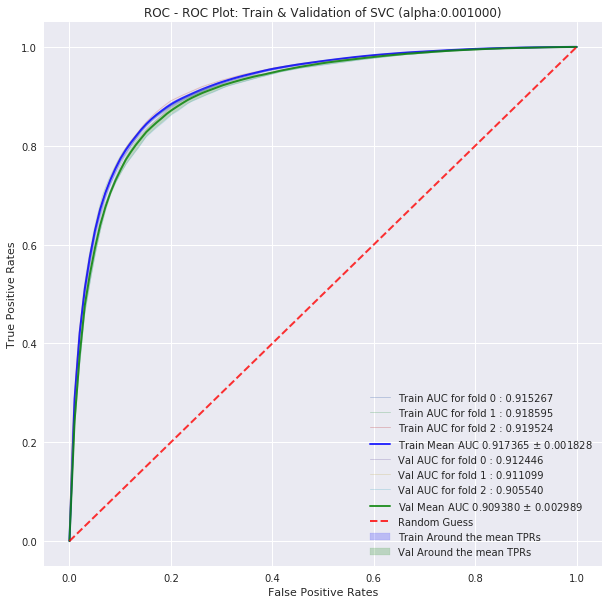

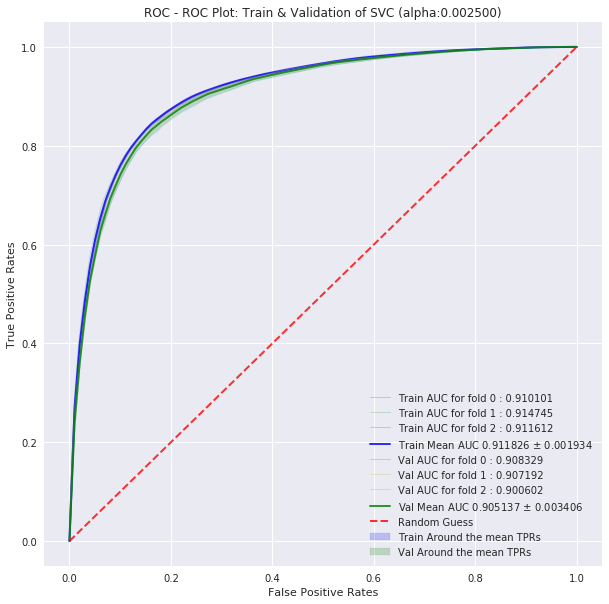

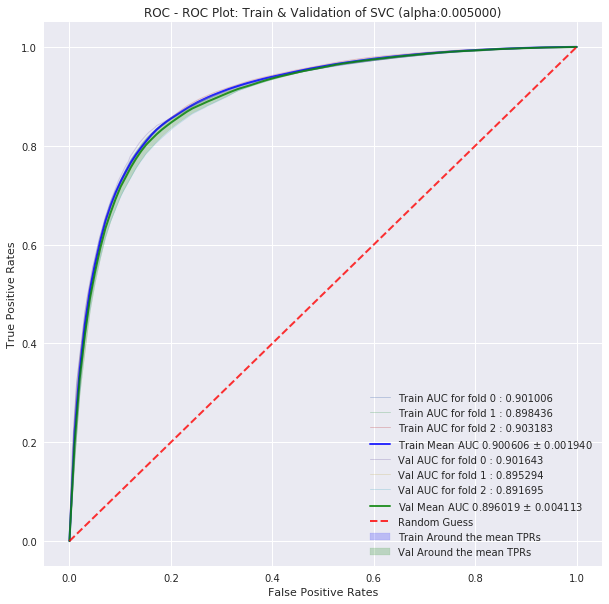

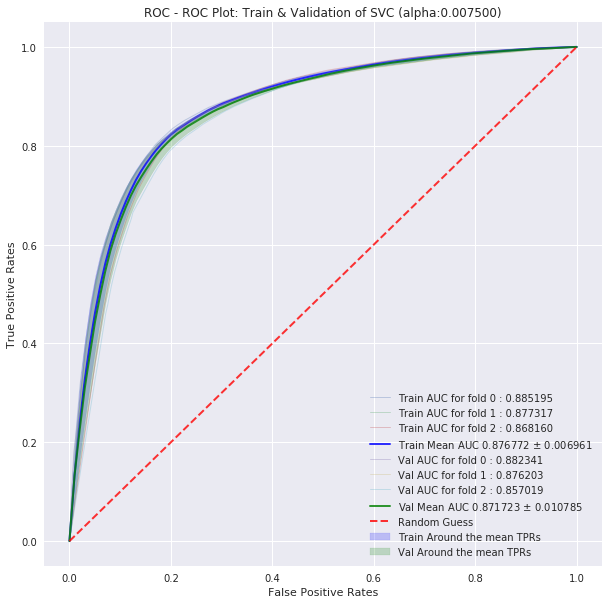

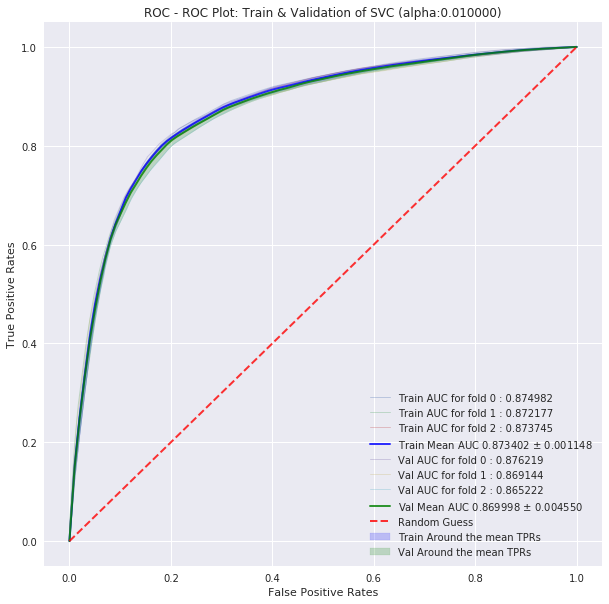

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


 The alpah vs AUC score plot


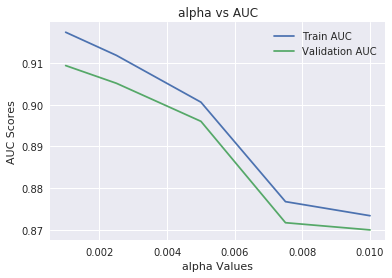

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Best hyperparam value:  0.001


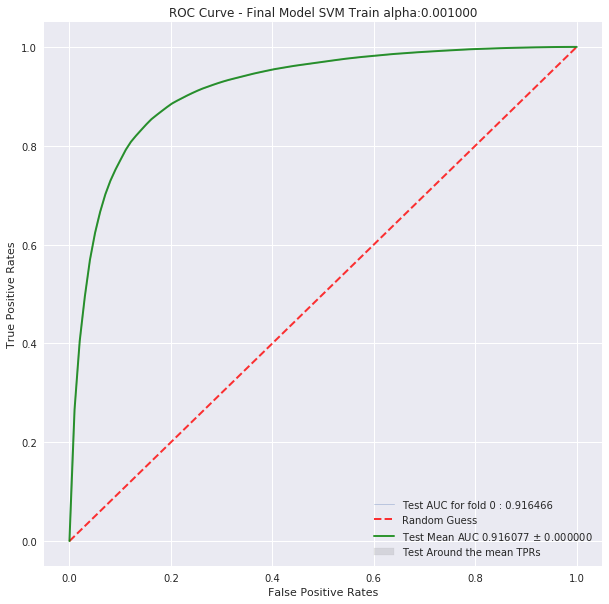

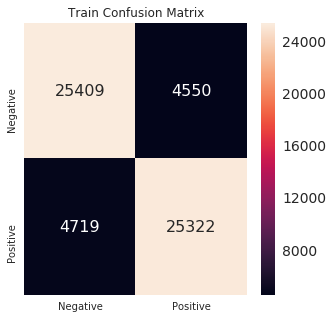

               Negative      Positive
Precision      0.843368      0.847683
Recall         0.848126      0.842915
Fscore         0.845740      0.845292
Support    29959.000000  30041.000000


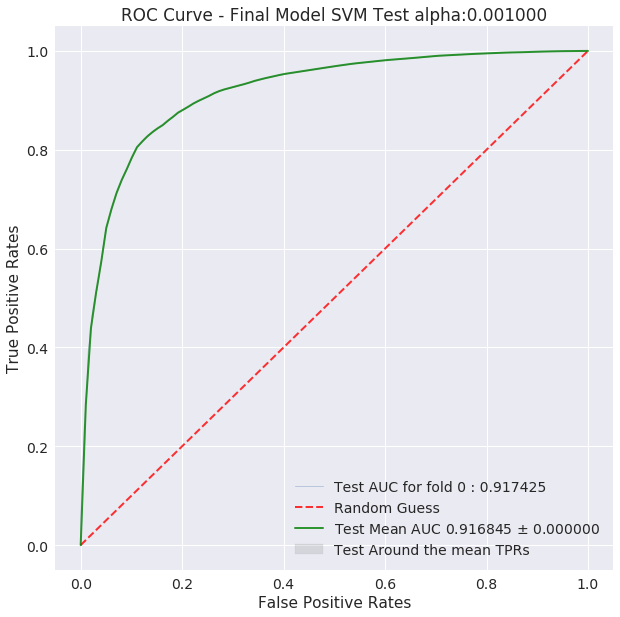

Test auc score  0.916844889943923


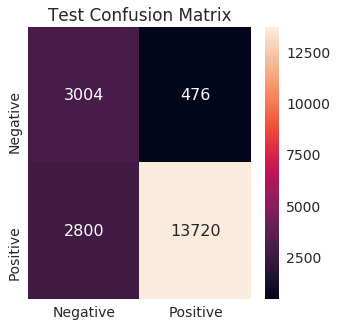

              Negative      Positive
Precision     0.517574      0.966469
Recall        0.863218      0.830508
Fscore        0.647135      0.893345
Support    3480.000000  16520.000000
Results Summary: 
 [('Hyper Param', '0.001'), ('AUC', '0.9168'), ('f-score(-ve)', '64.7135'), ('f-score(+ve)', '89.3345')]


In [10]:
# read the train, test data and preprocess it
train_features, train_labels, test_features, test_labels = preprocess_data(config_dict,
                                                                           scaling=True,
                                                                           dim_reduction=False)

# get name of features as list
feature_name_list = train_features.columns.values.tolist()

# train and validate the model
model = train_and_validate_model(config_dict, train_features, train_labels)

# test and evaluate the model
ptabe_entry_a1 = test_and_evaluate_model(config_dict, model, test_features, test_labels)

### identify important features for +ve, -ve

In [11]:
# word cloud object for displaying feature importances
wc = WordCloud(background_color='white', width=800, height=800)

# form a feature importance data frame
feat_imp_df = pd.DataFrame({'Feature': feature_name_list, 'Weight':model[0].coef_[0]}, 
                           index=range(len(feature_name_list)))

#### Importnat features for +ve

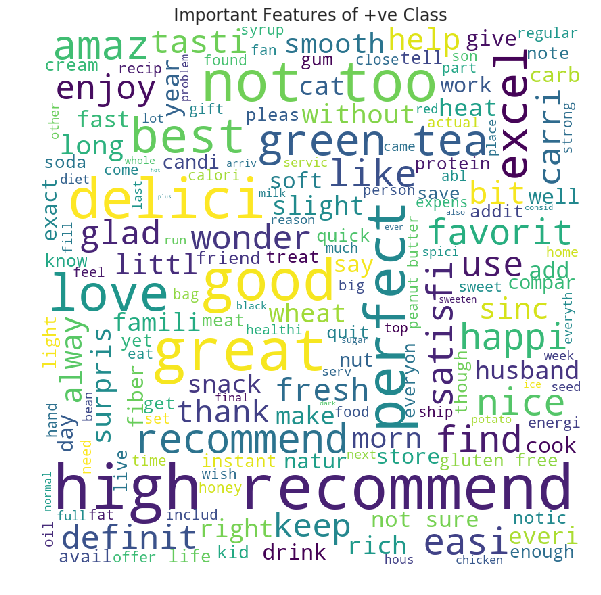

In [12]:
# annotate with feature names (words)
feat_imp_df_positive =  feat_imp_df[feat_imp_df['Weight'] > 0.0]

# create word cloud
wc_output = wc.generate_from_frequencies(dict(zip(feat_imp_df_positive['Feature'], 
                                                  feat_imp_df_positive['Weight'])))
plt.figure(figsize=(8, 8))
plt.imshow(wc_output)
plt.axis('off')
plt.tight_layout(pad=0.0)
plt.title('Important Features of +ve Class')
plt.show()

#### important features for - ve

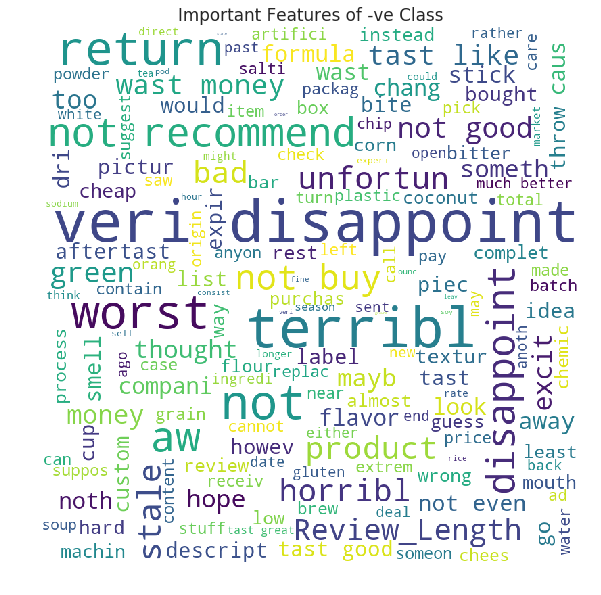

In [13]:
# annotate with feature names (words)
feat_imp_df_negative =  feat_imp_df[feat_imp_df['Weight'] < 0.0]

# create word cloud
wc_output = wc.generate_from_frequencies(dict(zip(feat_imp_df_negative['Feature'], 
                                                  abs(feat_imp_df_negative['Weight']))))
plt.figure(figsize=(8, 8))
plt.imshow(wc_output)
plt.axis('off')
plt.tight_layout(pad=0.0)
plt.title('Important Features of -ve Class')
plt.show()

## Observation

%%HTML
<ul>
<li> bigram feature like 'high recommend' identified for +ve class and 'veri disapoint' identified 
     for -ve class</li>
</ul> 

#### With L2 Regularization

In [14]:
config_dict = {
    'train_csv_path' : '/home/amd_3/AAIC/ASM_REPO/Processed_data/AMZN_FOOD_REVIW/BOW/train_bow_bigram.csv',
    'test_csv_path' : '/home/amd_3/AAIC/ASM_REPO/Processed_data/AMZN_FOOD_REVIW/BOW/test_bow_bigram.csv',
    'train_size' : 60000,
    'test_size' : 20000,
    'hyperparam_list' : [1.0, 0.1, 0.001, 0.0001],
    'penalty' : 'l2', # l1, l2
    'kernel' : 'linear',
    'implementation' : 'SGD' # 'SGD' or 'SVC'
}

Train df shape (60000, 503)
Class label distribution in train df:
 1    30041
0    29959
Name: Label, dtype: int64
Test df shape (20000, 503)
Class label distribution in test df:
 1    16520
0     3480
Name: Label, dtype: int64
Shape of ->  train features :60000,501, test features: 20000,501
Shape of -> train labels :60000, test labels: 20000


/home/amd_3/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


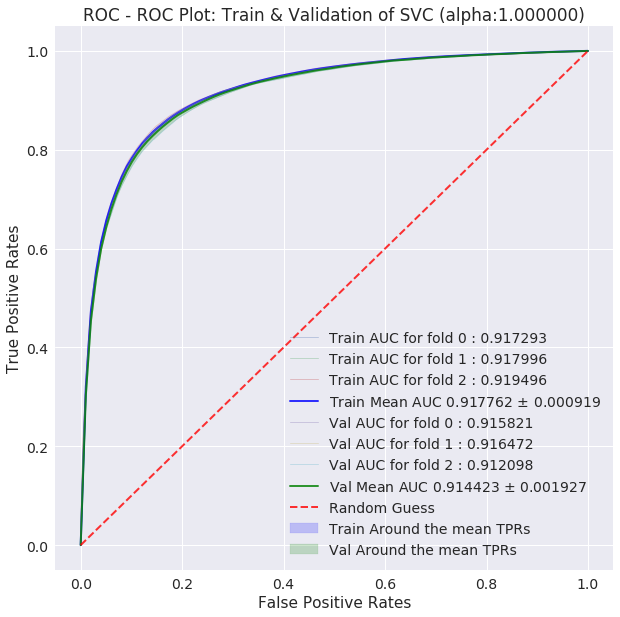

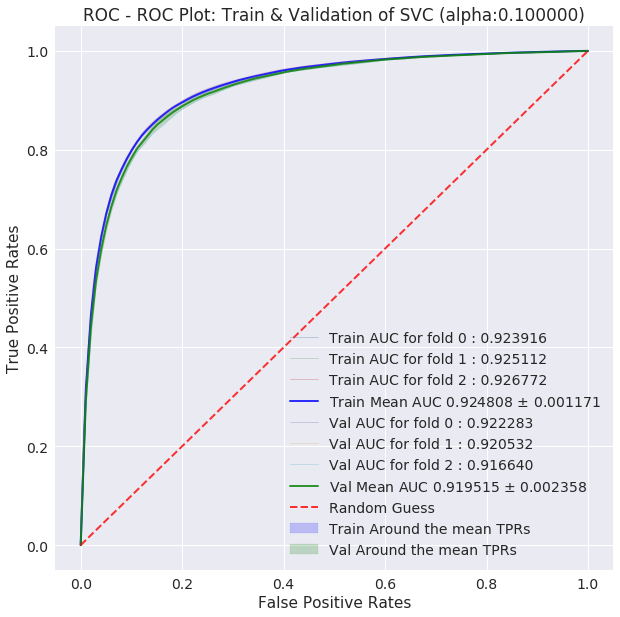

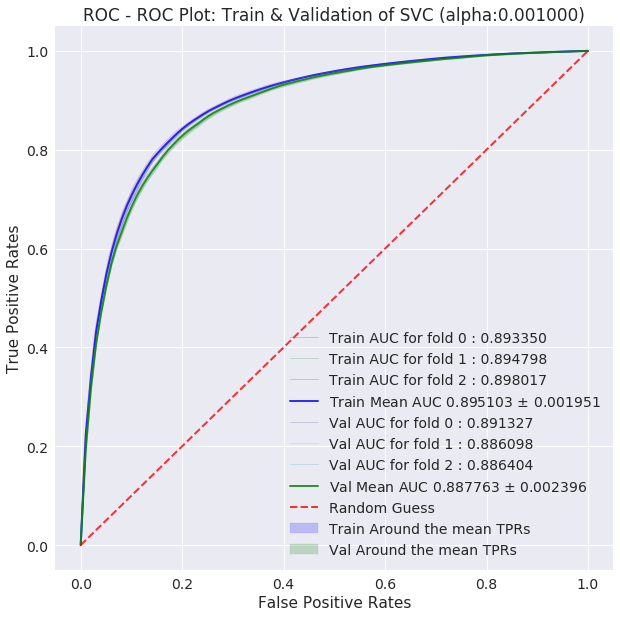

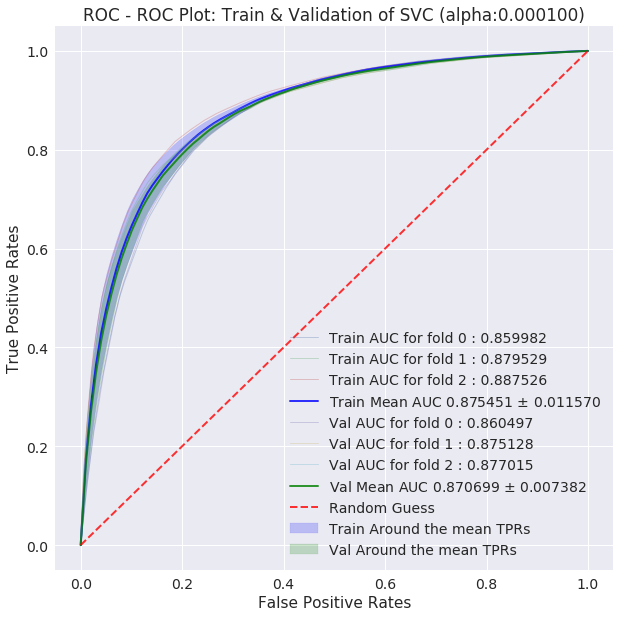

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


 The alpah vs AUC score plot


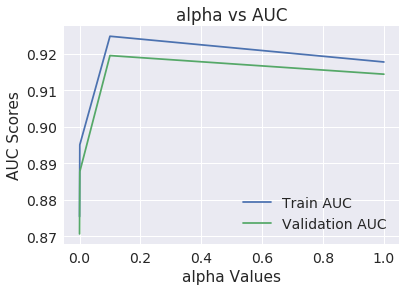

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Best hyperparam value:  0.1


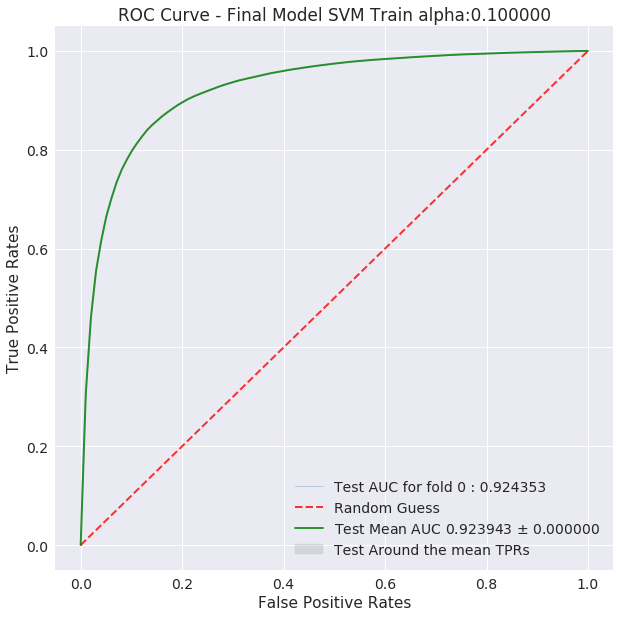

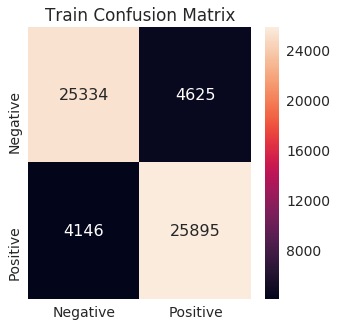

               Negative      Positive
Precision      0.859362      0.848460
Recall         0.845622      0.861989
Fscore         0.852437      0.855171
Support    29959.000000  30041.000000


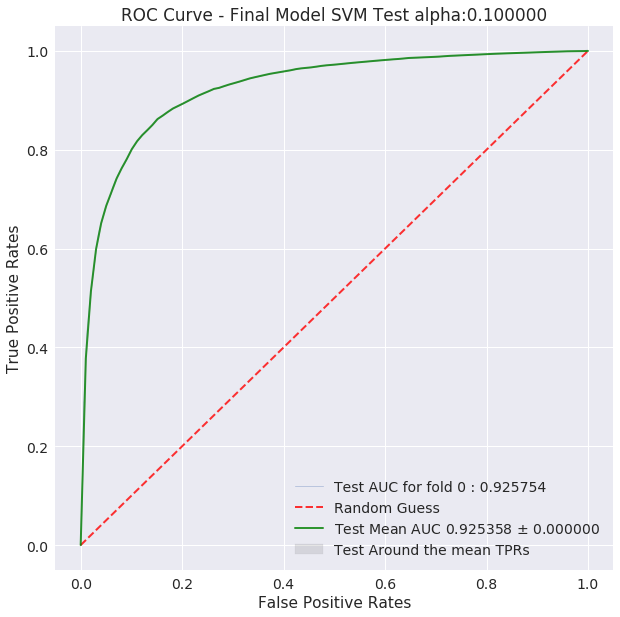

Test auc score  0.9253577322906739


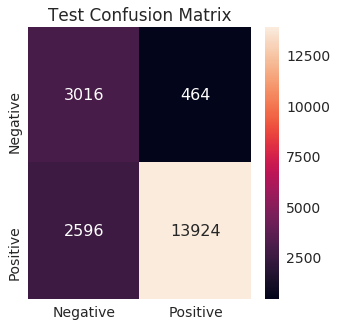

              Negative      Positive
Precision     0.537420      0.967751
Recall        0.866667      0.842857
Fscore        0.663440      0.900997
Support    3480.000000  16520.000000
Results Summary: 
 [('Hyper Param', '0.1'), ('AUC', '0.9254'), ('f-score(-ve)', '66.3440'), ('f-score(+ve)', '90.0997')]


In [15]:
# read the train, test data and preprocess it
train_features, train_labels, test_features, test_labels = preprocess_data(config_dict,
                                                                            scaling=True,
                                                                            dim_reduction=False)

# train and validate the model
model = train_and_validate_model(config_dict, train_features, train_labels)

# test and evaluate the model
ptabe_entry_a2 = test_and_evaluate_model(config_dict, model, test_features, test_labels)

%%HTML
<ul>
<li> Precision for -ve class is low (0.53) </li>
<li> There are many positive data points which are misscalssified (2596) </li>
</ul>

### [A.2] Applying Linear SVM on TFIDF,<font color='red'> SET 2</font>

In [16]:
config_dict = {
    'train_csv_path' : '/home/amd_3/AAIC/ASM_REPO/Processed_data/AMZN_FOOD_REVIW/TFIDF/train_bigram_tfidf.csv',
    'test_csv_path' : '/home/amd_3/AAIC/ASM_REPO/Processed_data/AMZN_FOOD_REVIW/TFIDF/test_bigram_tfidf.csv',
    'train_size' : 60000,
    'test_size' : 20000,
    'hyperparam_list' : [1.0, 0.1, 0.001, 0.0001],
    'penalty' : 'l1', # l1, l2
    'kernel' : 'linear',
    'implementation' : 'SGD' # 'SGD' or 'SVC'

}

Train df shape (60000, 503)
Class label distribution in train df:
 1    30041
0    29959
Name: Label, dtype: int64
Test df shape (20000, 503)
Class label distribution in test df:
 1    16520
0     3480
Name: Label, dtype: int64
Shape of ->  train features :60000,501, test features: 20000,501
Shape of -> train labels :60000, test labels: 20000


/home/amd_3/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


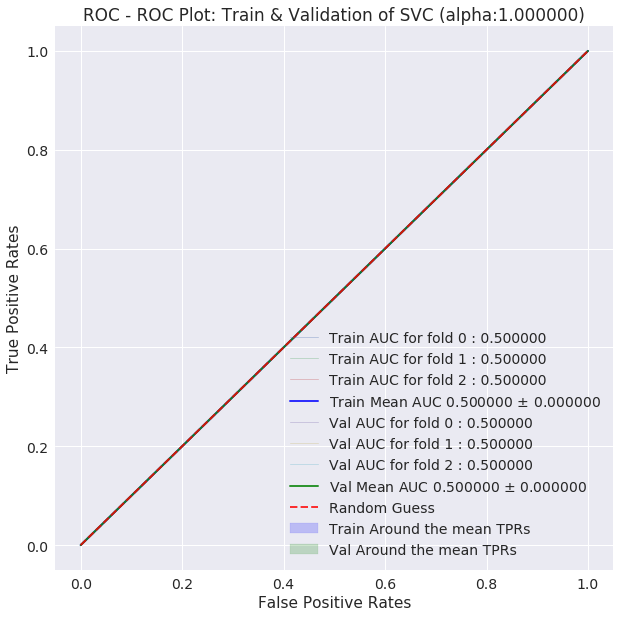

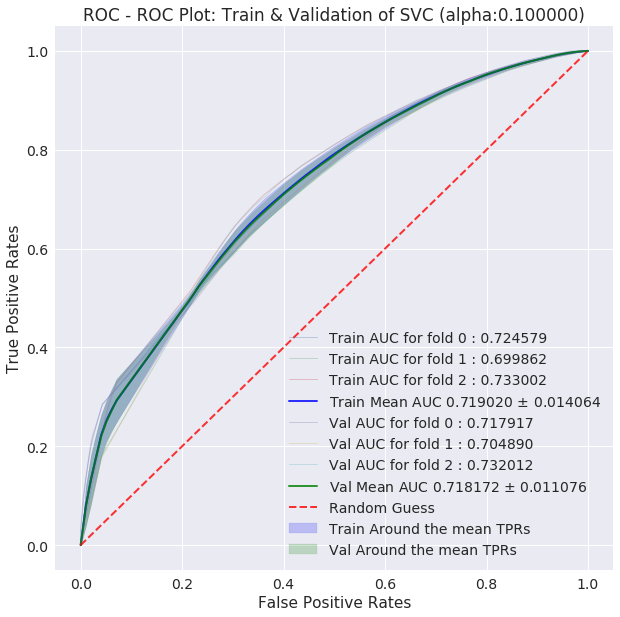

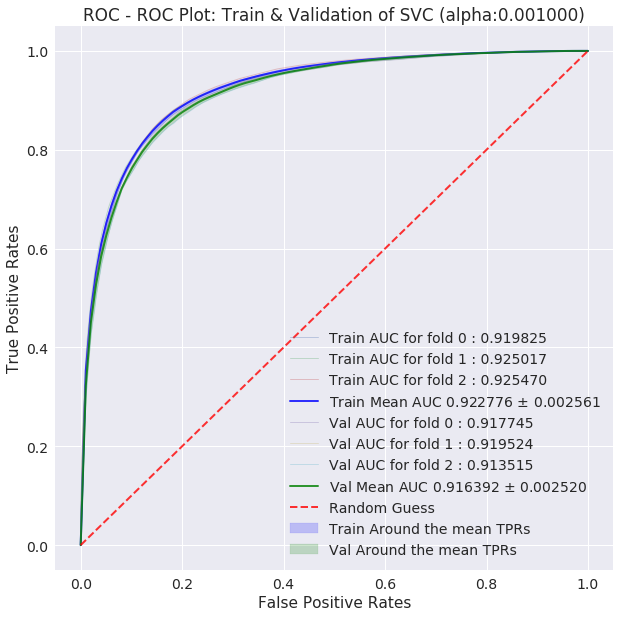

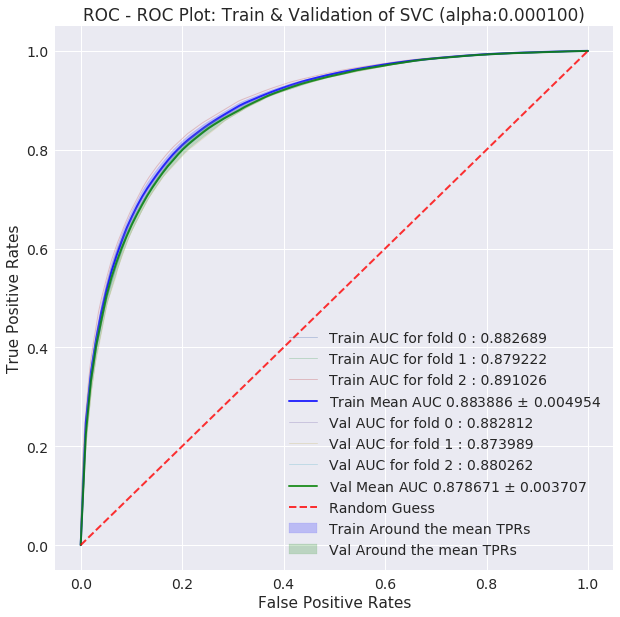

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


 The alpah vs AUC score plot


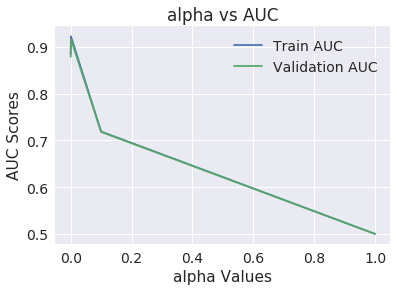

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Best hyperparam value:  0.001


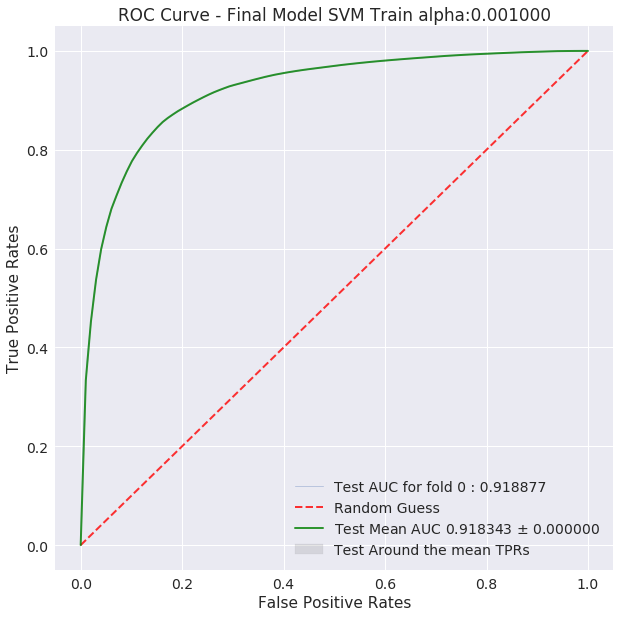

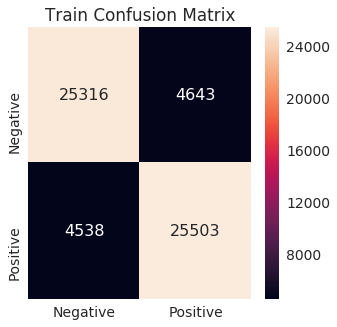

               Negative      Positive
Precision      0.847994      0.845983
Recall         0.845022      0.848940
Fscore         0.846505      0.847459
Support    29959.000000  30041.000000


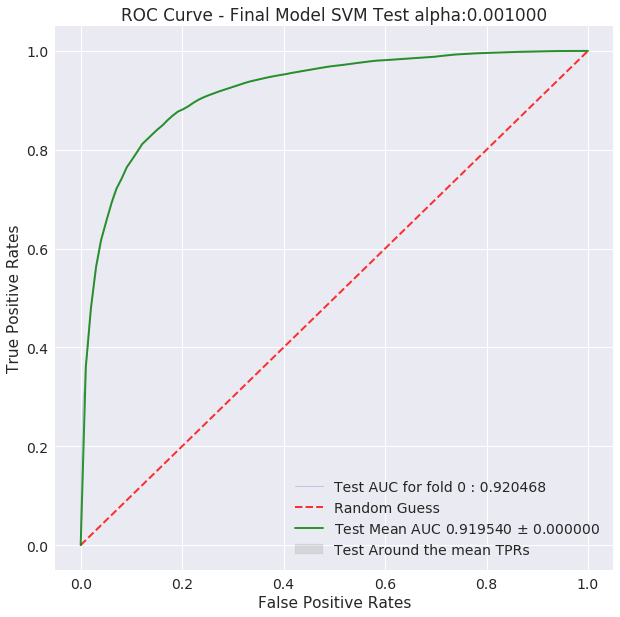

Test auc score  0.9195395651803061


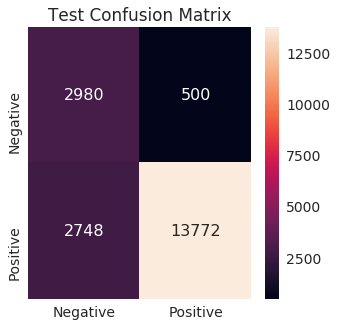

              Negative      Positive
Precision     0.520251      0.964966
Recall        0.856322      0.833656
Fscore        0.647263      0.894518
Support    3480.000000  16520.000000
Results Summary: 
 [('Hyper Param', '0.001'), ('AUC', '0.9195'), ('f-score(-ve)', '64.7263'), ('f-score(+ve)', '89.4518')]


In [17]:
# read the train, test data and preprocess it
train_features, train_labels, test_features, test_labels = preprocess_data(config_dict,
                                                                            scaling=True,
                                                                            dim_reduction=False)
# get name of featues as list
feature_name_list = train_features.columns.values.tolist()

# train and validate the model
model = train_and_validate_model(config_dict, train_features, train_labels)

# test and evaluate the model
ptabe_entry_a3 = test_and_evaluate_model(config_dict, model, test_features, test_labels)

%%HTML
<ul>
<li> Precision for -ve class is low (0.52) </li>
<li> There are many positive data points which are misscalssified (2748) </li>
</ul>

In [18]:
# word cloud object for displaying feature importances
wc = WordCloud(background_color='white', width=800, height=800)

# form a feature importance data frame
feat_imp_df = pd.DataFrame({'Feature': feature_name_list, 'Weight':model[0].coef_[0]}, 
                           index=range(len(feature_name_list)))

#### Important features for +ve

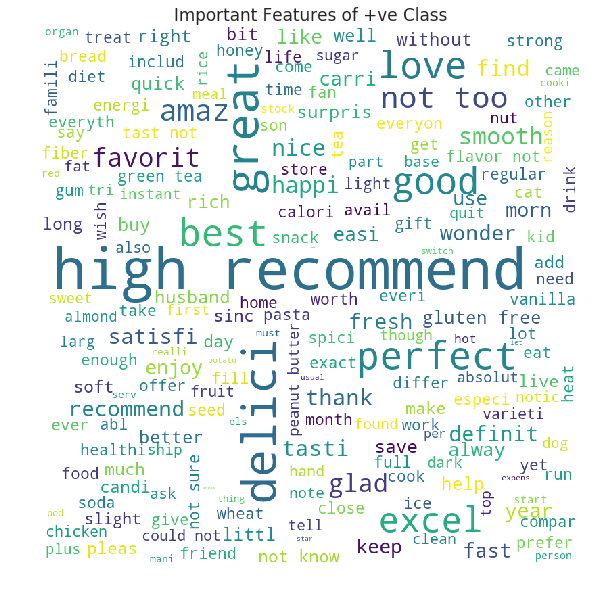

In [19]:
# annotate with feature names (words)
feat_imp_df_positive =  feat_imp_df[feat_imp_df['Weight'] > 0.0]

# create word cloud
wc_output = wc.generate_from_frequencies(dict(zip(feat_imp_df_positive['Feature'], 
                                                  feat_imp_df_positive['Weight'])))
plt.figure(figsize=(8, 8))
plt.imshow(wc_output)
plt.axis('off')
plt.tight_layout(pad=0.0)
plt.title('Important Features of +ve Class')
plt.show()

#### Important features for -ve

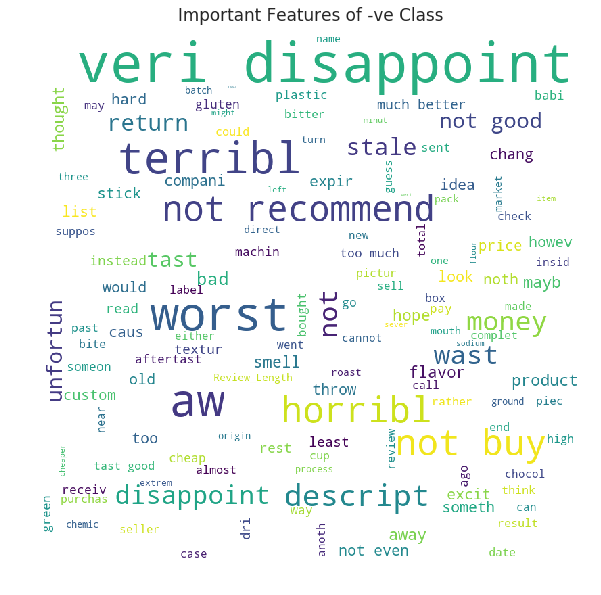

In [20]:
# annotate with feature names (words)
feat_imp_df_negative =  feat_imp_df[feat_imp_df['Weight'] < 0.0]

# create word cloud
wc_output = wc.generate_from_frequencies(dict(zip(feat_imp_df_negative['Feature'], 
                                                  abs(feat_imp_df_negative['Weight']))))
plt.figure(figsize=(8, 8))
plt.imshow(wc_output)
plt.axis('off')
plt.tight_layout(pad=0.0)
plt.title('Important Features of -ve Class')
plt.show()

## Observation

%%HTML
<ul>
<li> bigram feature like 'high recommend' identified for +ve class and 'veri disapoint' identified 
     for -ve class</li>
</ul> 

#### With L2 Regularization

In [21]:
config_dict = {
    'train_csv_path' : '/home/amd_3/AAIC/ASM_REPO/Processed_data/AMZN_FOOD_REVIW/TFIDF/train_bigram_tfidf.csv',
    'test_csv_path' : '/home/amd_3/AAIC/ASM_REPO/Processed_data/AMZN_FOOD_REVIW/TFIDF/test_bigram_tfidf.csv',
    'train_size' : 60000,
    'test_size' : 20000,
    'hyperparam_list' : [1.0, 0.1, 0.001, 0.0001],
    'penalty' : 'l2', # l1, l2
    'kernel' : 'linear',
    'implementation' : 'SGD' # 'SGD' or 'SVC'
}

Train df shape (60000, 503)
Class label distribution in train df:
 1    30041
0    29959
Name: Label, dtype: int64
Test df shape (20000, 503)
Class label distribution in test df:
 1    16520
0     3480
Name: Label, dtype: int64
Shape of ->  train features :60000,501, test features: 20000,501
Shape of -> train labels :60000, test labels: 20000


/home/amd_3/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


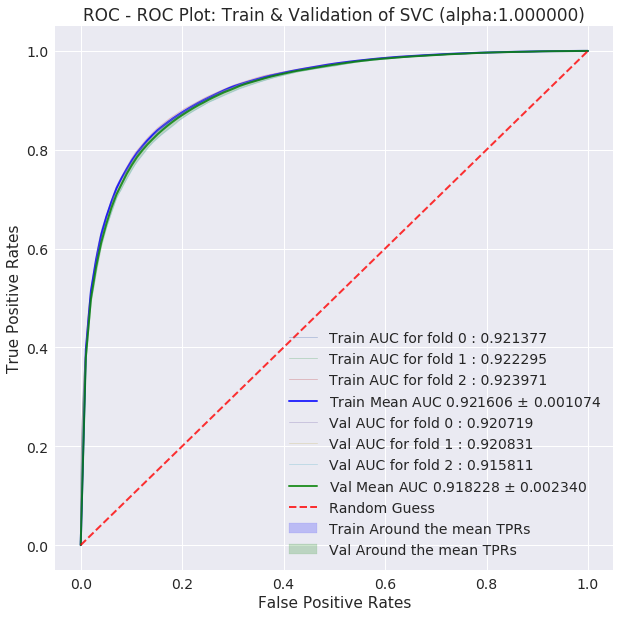

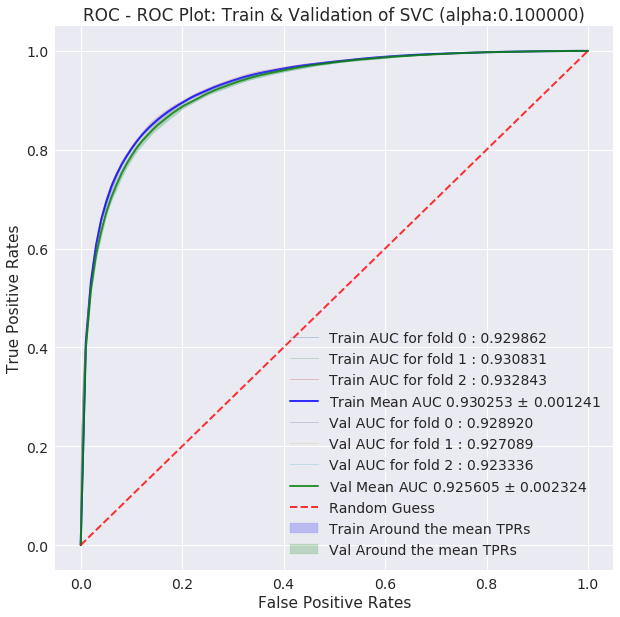

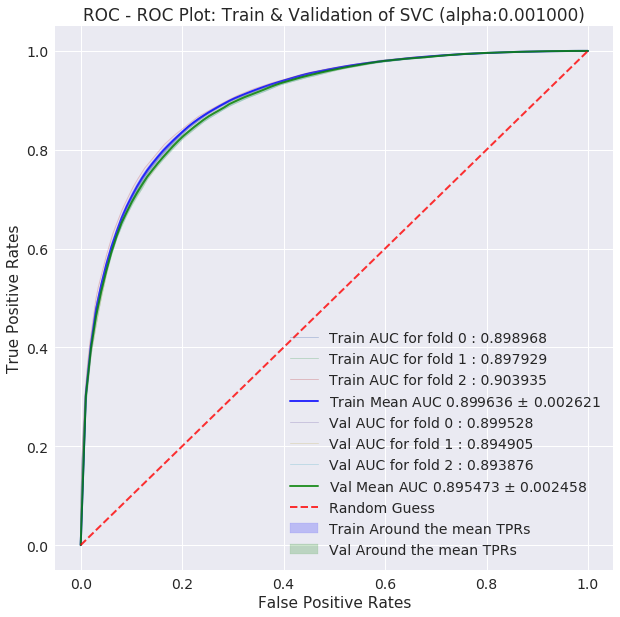

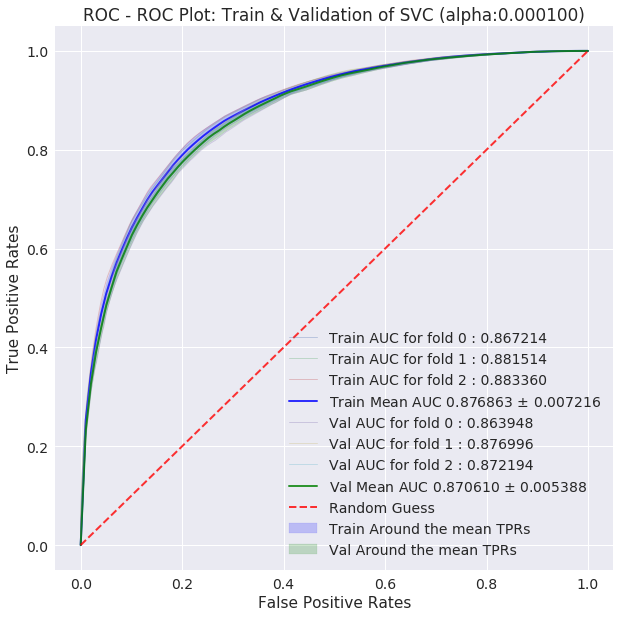

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


 The alpah vs AUC score plot


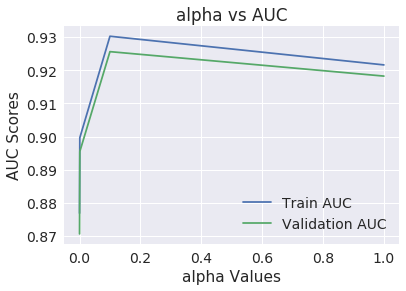

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Best hyperparam value:  0.1


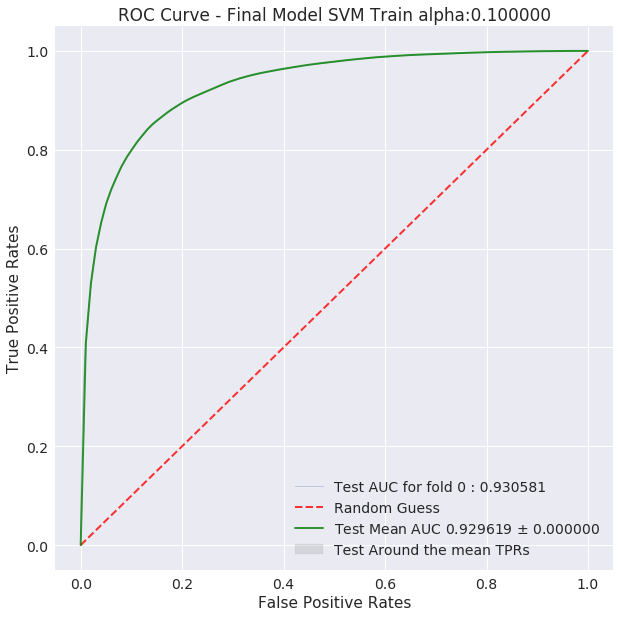

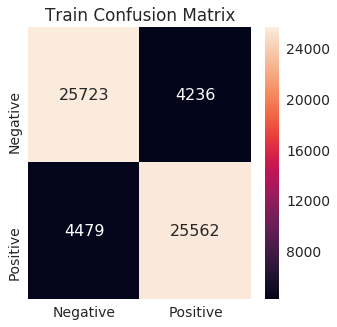

               Negative      Positive
Precision      0.851699      0.857843
Recall         0.858607      0.850904
Fscore         0.855139      0.854359
Support    29959.000000  30041.000000


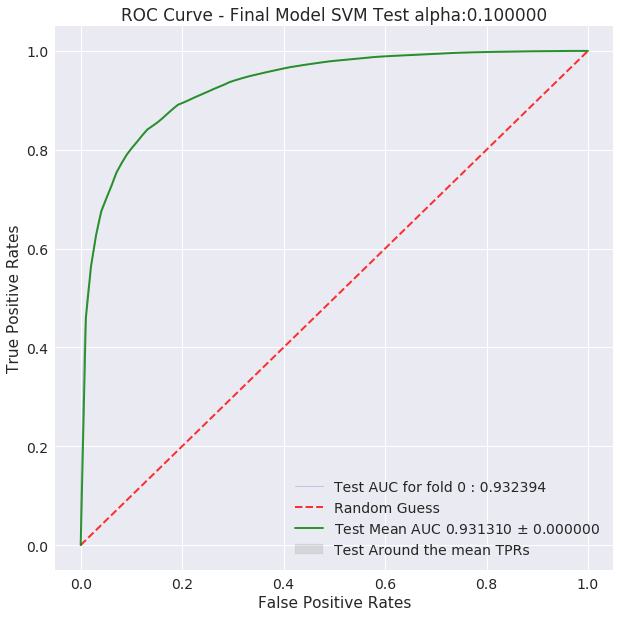

Test auc score  0.9313095360936419


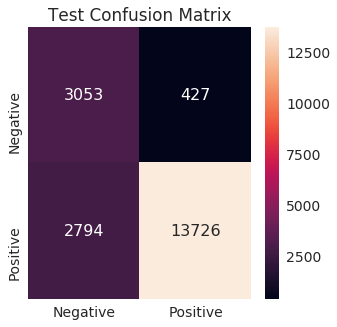

              Negative      Positive
Precision     0.522148      0.969830
Recall        0.877299      0.830872
Fscore        0.654659      0.894989
Support    3480.000000  16520.000000
Results Summary: 
 [('Hyper Param', '0.1'), ('AUC', '0.9313'), ('f-score(-ve)', '65.4659'), ('f-score(+ve)', '89.4989')]


In [22]:
# read the train, test data and preprocess it
train_features, train_labels, test_features, test_labels = preprocess_data(config_dict,
                                                                            scaling=True,
                                                                            dim_reduction=False)

# train and validate the model
model = train_and_validate_model(config_dict, train_features, train_labels)

# test and evaluate the model
ptabe_entry_a4 = test_and_evaluate_model(config_dict, model, test_features, test_labels)

%%HTML
<ul>
<li> Precision for -ve class is low (0.52) </li>
<li> There are many positive data points which are misscalssified (2794) </li>
</ul>

### [A.3]  Applying Linear SVM on AVG W2V,<font color='red'> SET 3</font>

In [23]:
config_dict = {
    'train_csv_path' : '/home/amd_3/AAIC/ASM_REPO/Processed_data/AMZN_FOOD_REVIW/AVG_W2V/train_avg_w2v.csv',
    'test_csv_path' : '/home/amd_3/AAIC/ASM_REPO/Processed_data/AMZN_FOOD_REVIW/AVG_W2V/test_avg_w2v.csv',
    'train_size' : 60000,
    'test_size' : 20000,
    'hyperparam_list' : [1.0, 0.1, 0.001, 0.0001],
    'penalty' : 'l1', # l1, l2 
    'kernel' : 'linear',
    'implementation' : 'SGD' # 'SGD' or 'SVC'
}

Train df shape (60000, 52)
Class label distribution in train df:
 1    30041
0    29959
Name: Label, dtype: int64
Test df shape (20000, 52)
Class label distribution in test df:
 1    16520
0     3480
Name: Label, dtype: int64
Shape of ->  train features :60000,50, test features: 20000,50
Shape of -> train labels :60000, test labels: 20000


/home/amd_3/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


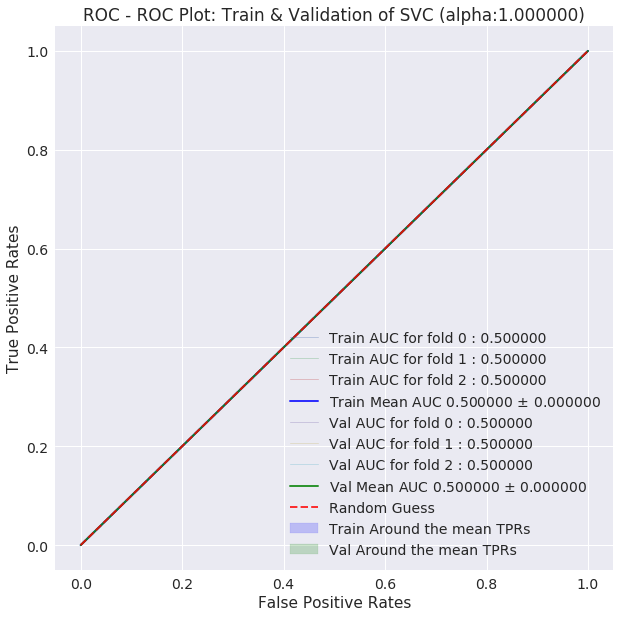

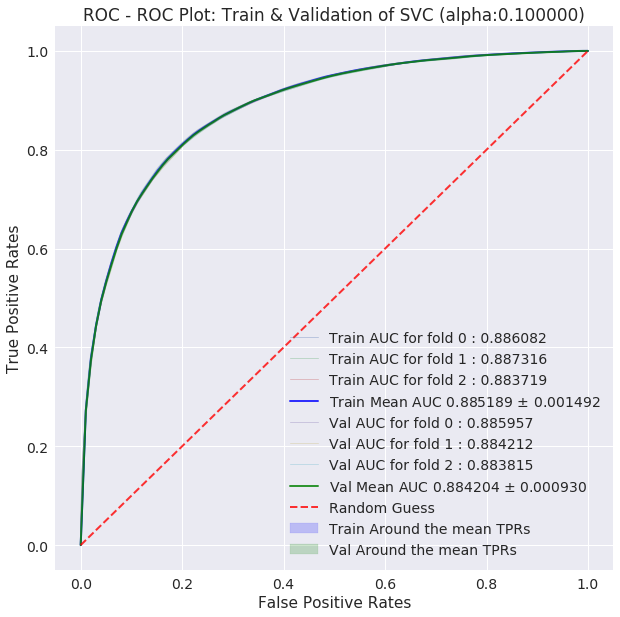

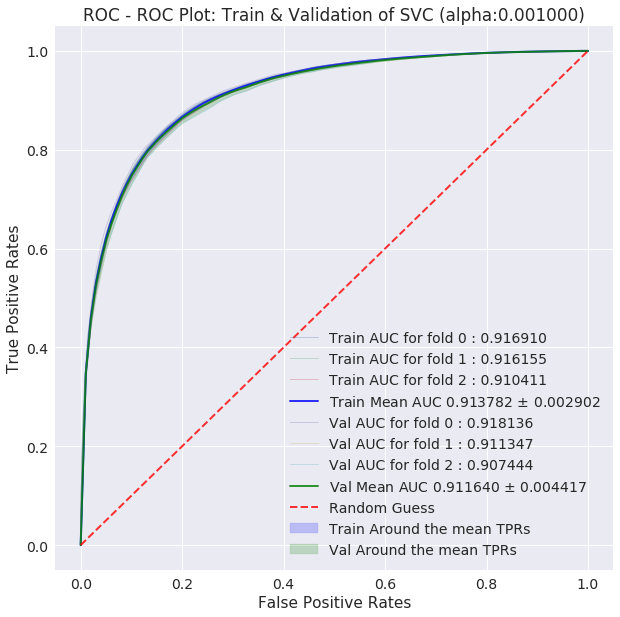

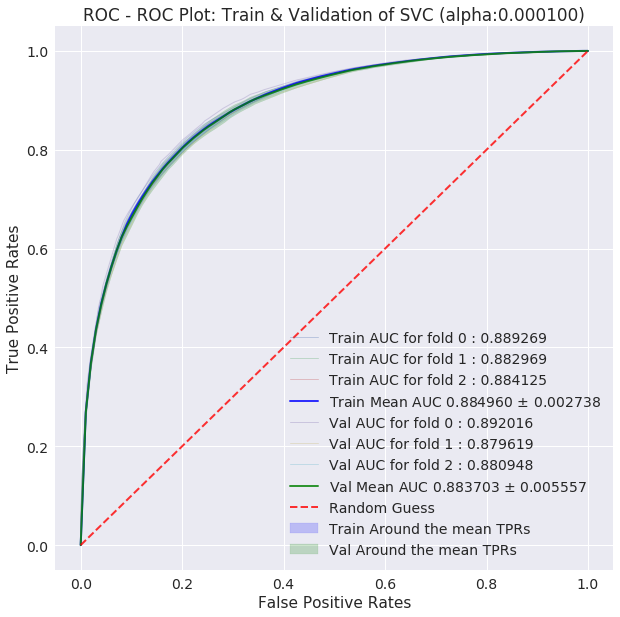

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


 The alpah vs AUC score plot


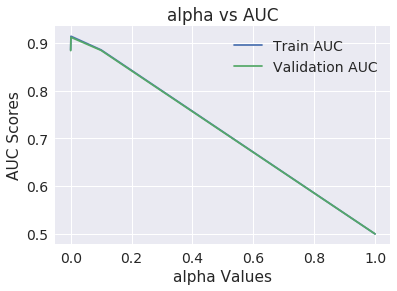

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Best hyperparam value:  0.001


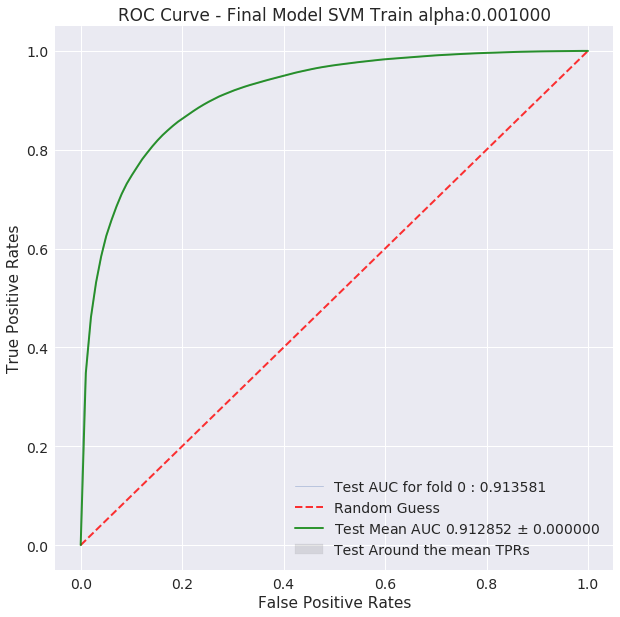

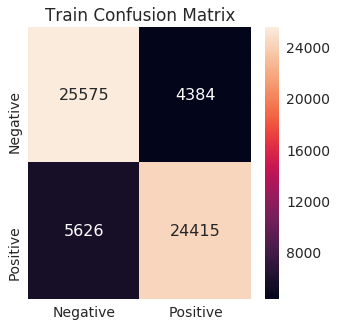

               Negative      Positive
Precision      0.819685      0.847772
Recall         0.853667      0.812723
Fscore         0.836331      0.829878
Support    29959.000000  30041.000000


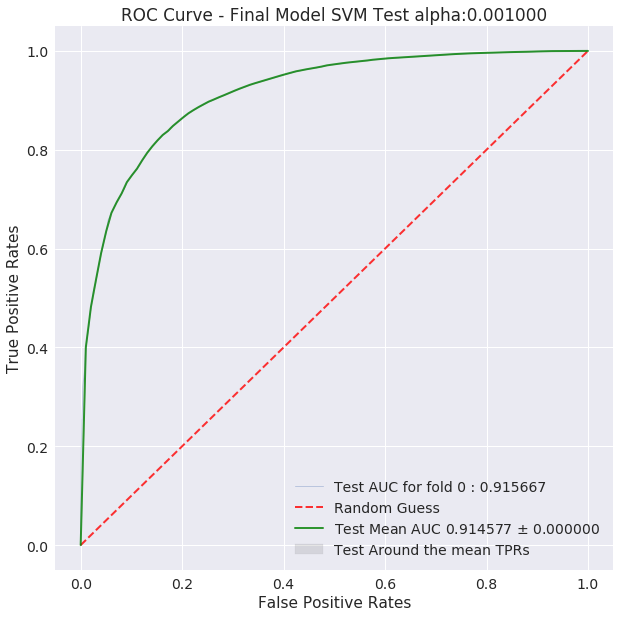

Test auc score  0.9145765714868576


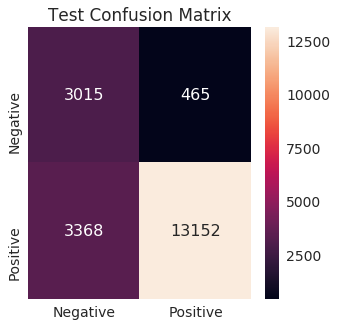

              Negative      Positive
Precision     0.472348      0.965852
Recall        0.866379      0.796126
Fscore        0.611376      0.872814
Support    3480.000000  16520.000000
Results Summary: 
 [('Hyper Param', '0.001'), ('AUC', '0.9146'), ('f-score(-ve)', '61.1376'), ('f-score(+ve)', '87.2814')]


In [24]:
# read the train, test data and preprocess it
train_features, train_labels, test_features, test_labels = preprocess_data(config_dict,
                                                                            scaling=True,
                                                                            dim_reduction=False)

# train and validate the model
model = train_and_validate_model(config_dict, train_features, train_labels)

# test and evaluate the model
ptabe_entry_a5 = test_and_evaluate_model(config_dict, model, test_features, test_labels)

%%HTML
<ul>
<li> With $\alpha = 1.0$ the model performance is similar to random classifier</li>
<li> There is sharp drop in AUC when $\alpha$ increases </li>
<li> Precision for -ve class is low (0.47) </li>
<li> There are many positive data points which are misscalssified (3368) </li>
</ul>

#### With L2 Regularization

In [25]:
config_dict = {
    'train_csv_path' : '/home/amd_3/AAIC/ASM_REPO/Processed_data/AMZN_FOOD_REVIW/AVG_W2V/train_avg_w2v.csv',
    'test_csv_path' : '/home/amd_3/AAIC/ASM_REPO/Processed_data/AMZN_FOOD_REVIW/AVG_W2V/test_avg_w2v.csv',
    'train_size' : 60000,
    'test_size' : 20000,
    'hyperparam_list' : [1.0, 0.1, 0.001, 0.0001],
    'penalty' : 'l2', # l1, l2
    'kernel' : 'linear',
    'implementation' : 'SGD' # 'SGD' or 'SVC'
}

Train df shape (60000, 52)
Class label distribution in train df:
 1    30041
0    29959
Name: Label, dtype: int64
Test df shape (20000, 52)
Class label distribution in test df:
 1    16520
0     3480
Name: Label, dtype: int64
Shape of ->  train features :60000,50, test features: 20000,50
Shape of -> train labels :60000, test labels: 20000


/home/amd_3/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


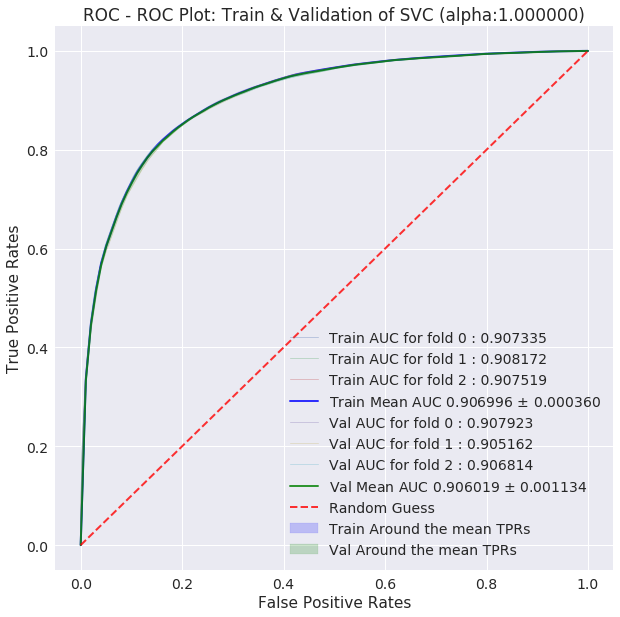

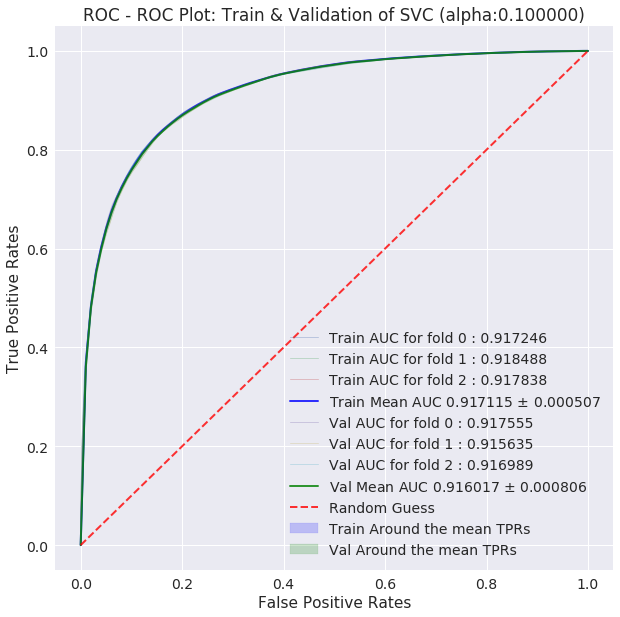

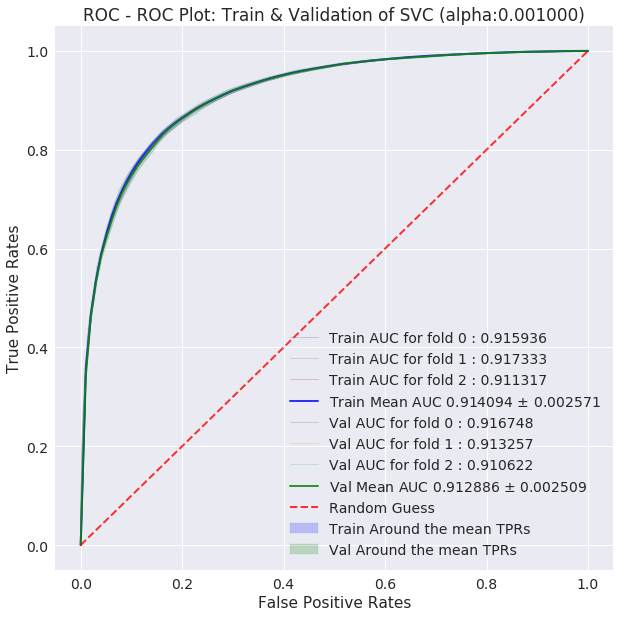

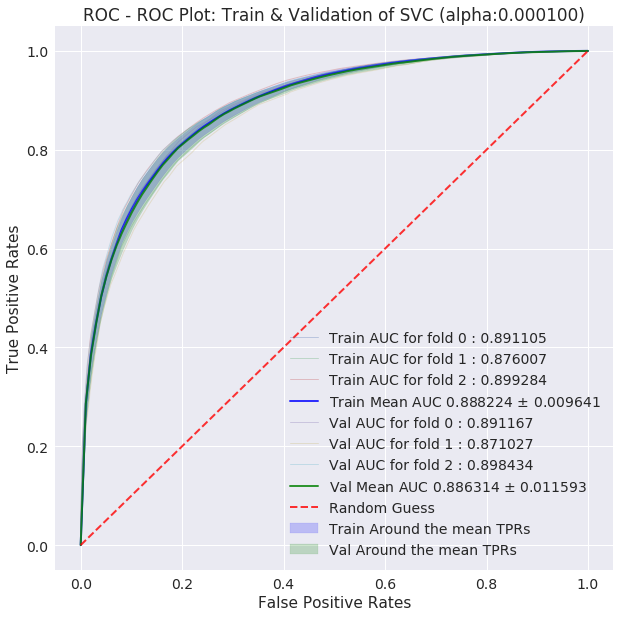

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


 The alpah vs AUC score plot


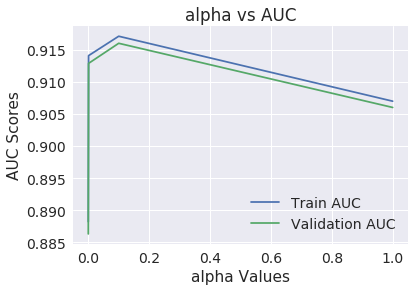

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Best hyperparam value:  0.1


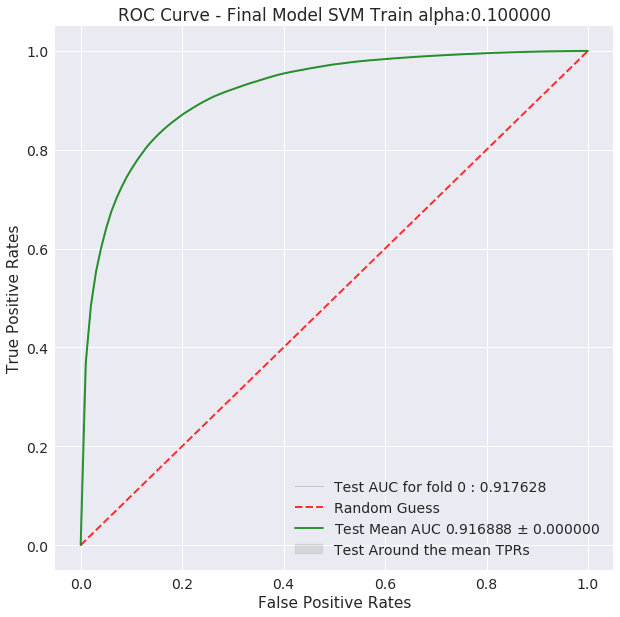

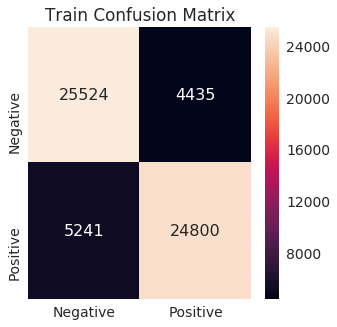

               Negative      Positive
Precision      0.829644      0.848298
Recall         0.851964      0.825538
Fscore         0.840656      0.836764
Support    29959.000000  30041.000000


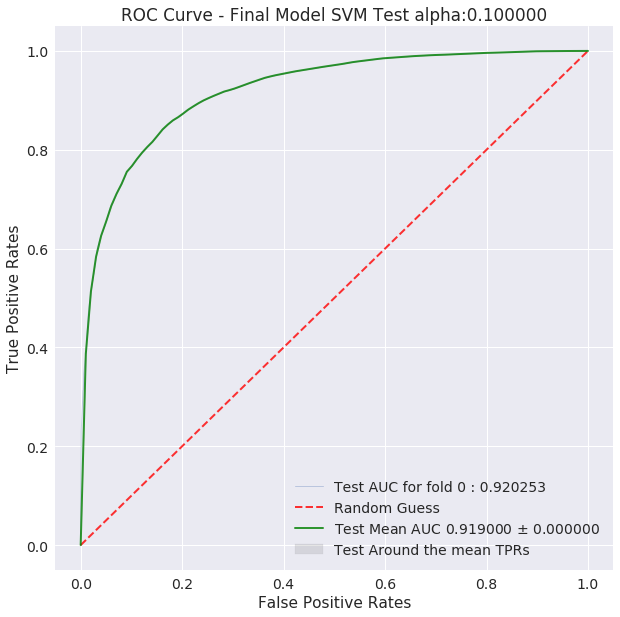

Test auc score  0.919000485828252


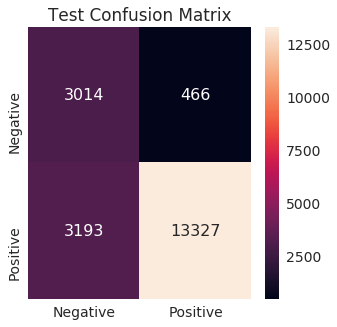

              Negative      Positive
Precision     0.485581      0.966215
Recall        0.866092      0.806719
Fscore        0.622277      0.879293
Support    3480.000000  16520.000000
Results Summary: 
 [('Hyper Param', '0.1'), ('AUC', '0.9190'), ('f-score(-ve)', '62.2277'), ('f-score(+ve)', '87.9293')]


In [26]:
# read the train, test data and preprocess it
train_features, train_labels, test_features, test_labels = preprocess_data(config_dict,
                                                                            scaling=True,
                                                                            dim_reduction=False)

# train and validate the model
model = train_and_validate_model(config_dict, train_features, train_labels)

# test and evaluate the model
ptabe_entry_a6 = test_and_evaluate_model(config_dict, model, test_features, test_labels)

%%HTML
<ul>
<li>The precision for -ve class is less (0.48) </li>
<li> There are 3193 positive data points which got misclassiified</li>
</ul>

### [A.4]  Applying Linear SVM on TFIDF W2V,<font color='red'> SET 4</font>

In [27]:
config_dict = {
    'train_csv_path' : '/home/amd_3/AAIC/ASM_REPO/Processed_data/AMZN_FOOD_REVIW/TFIDF_W2V/train_tf_w2v.csv',
    'test_csv_path' : '/home/amd_3/AAIC/ASM_REPO/Processed_data/AMZN_FOOD_REVIW/TFIDF_W2V/test_tf_w2v.csv',
    'train_size' : 60000,
    'test_size' : 20000,
    'hyperparam_list' : [1.0, 0.1, 0.001, 0.0001],
    'penalty' : 'l1', # l1, l2  
    'kernel' : 'linear',
    'implementation' : 'SGD' # 'SGD' or 'SVC'
}

Train df shape (60000, 52)
Class label distribution in train df:
 1    30041
0    29959
Name: Label, dtype: int64
Test df shape (20000, 52)
Class label distribution in test df:
 1    16520
0     3480
Name: Label, dtype: int64
Shape of ->  train features :60000,50, test features: 20000,50
Shape of -> train labels :60000, test labels: 20000


/home/amd_3/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


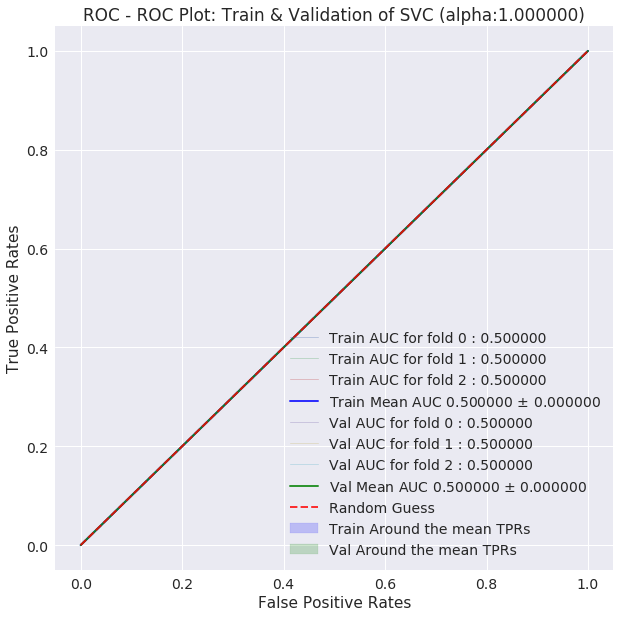

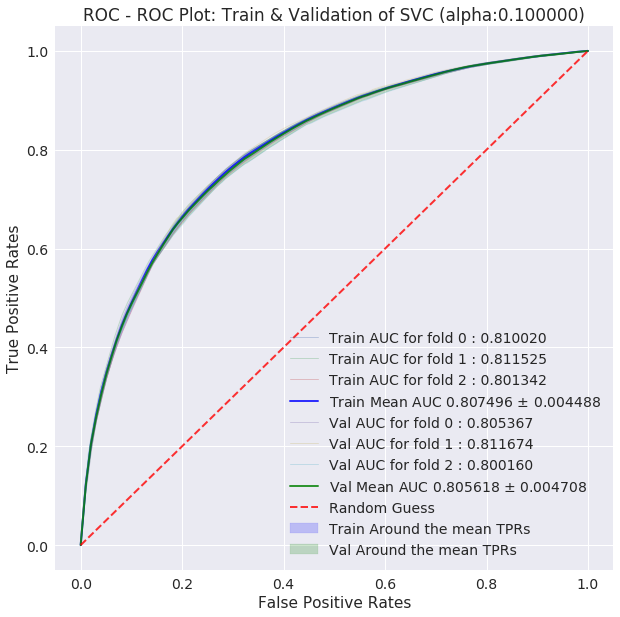

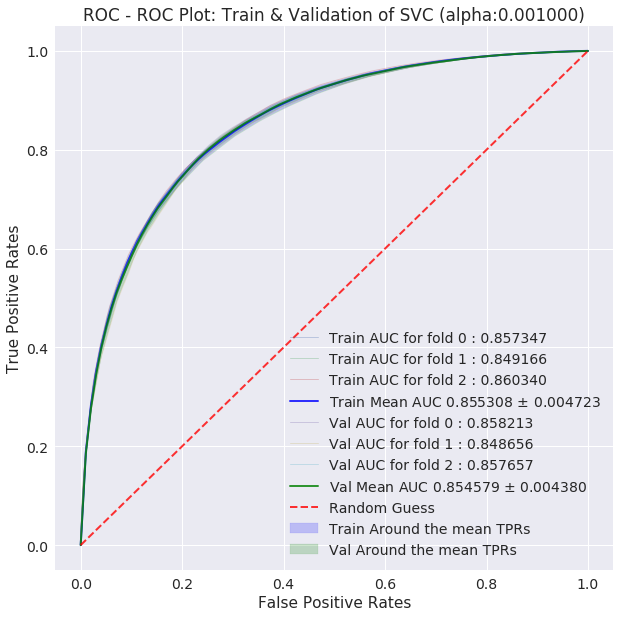

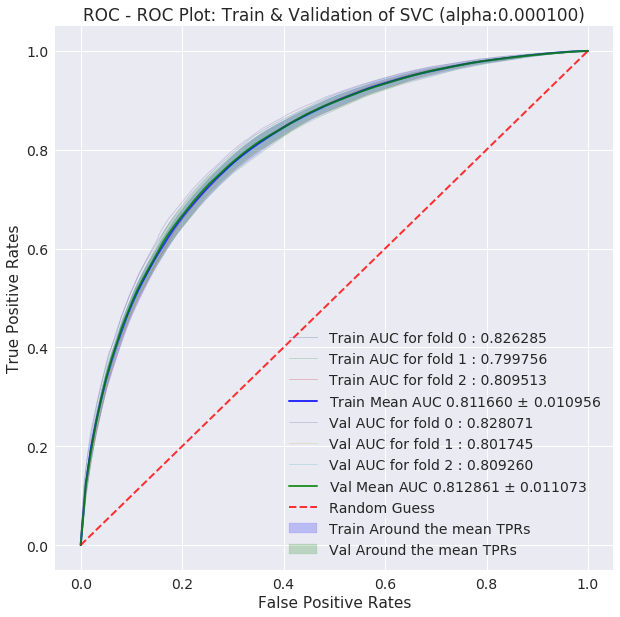

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


 The alpah vs AUC score plot


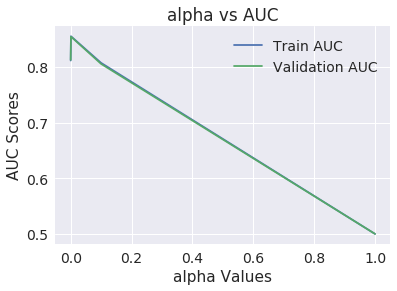

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Best hyperparam value:  0.001


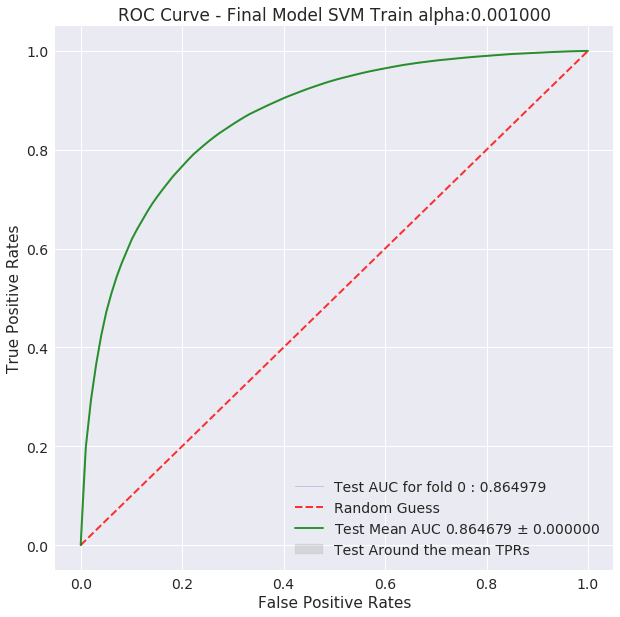

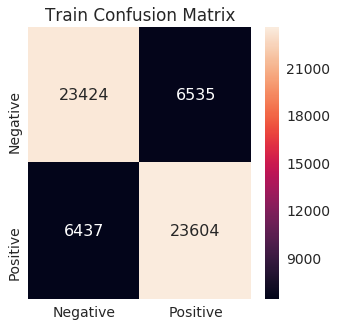

               Negative      Positive
Precision      0.784435      0.783171
Recall         0.781869      0.785726
Fscore         0.783149      0.784447
Support    29959.000000  30041.000000


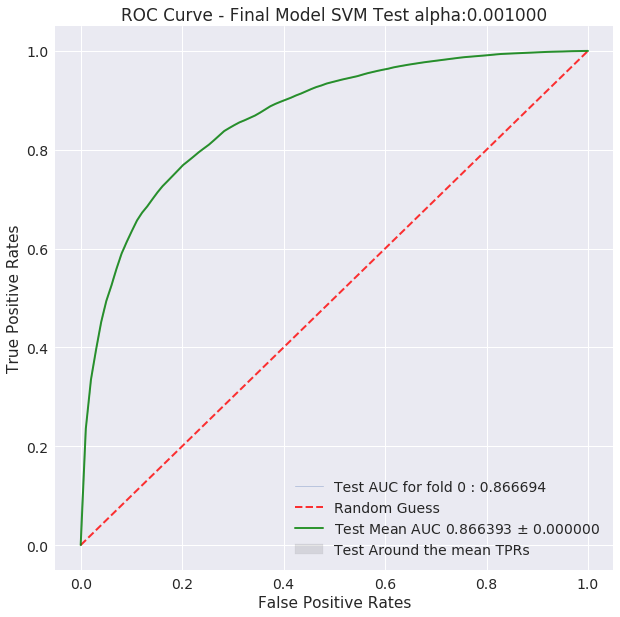

Test auc score  0.8663934131219616


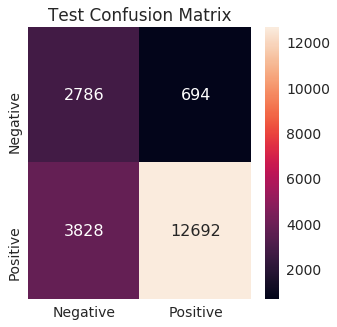

              Negative      Positive
Precision     0.421228      0.948155
Recall        0.800575      0.768281
Fscore        0.552011      0.848793
Support    3480.000000  16520.000000
Results Summary: 
 [('Hyper Param', '0.001'), ('AUC', '0.8664'), ('f-score(-ve)', '55.2011'), ('f-score(+ve)', '84.8793')]


In [28]:
# read the train, test data and preprocess it
train_features, train_labels, test_features, test_labels = preprocess_data(config_dict,
                                                                            scaling=True,
                                                                            dim_reduction=False)

# train and validate the model
model = train_and_validate_model(config_dict, train_features, train_labels)

# test and evaluate the model
ptabe_entry_a7 = test_and_evaluate_model(config_dict, model, test_features, test_labels)

%%HTML
<ul>
<li>The precision for -ve class is less (0.42) </li>
<li> There are 3828 positive data points which got misclassiified</li>
</ul>

#### With L2 Regularization

In [29]:
config_dict = {
    'train_csv_path' : '/home/amd_3/AAIC/ASM_REPO/Processed_data/AMZN_FOOD_REVIW/TFIDF_W2V/train_tf_w2v.csv',
    'test_csv_path' : '/home/amd_3/AAIC/ASM_REPO/Processed_data/AMZN_FOOD_REVIW/TFIDF_W2V/test_tf_w2v.csv',
    'train_size' : 60000,
    'test_size' : 20000,
    'hyperparam_list' : [1.0, 0.1, 0.001, 0.0001],
    'penalty' : 'l2', # l1, l2 
    'kernel' : 'linear',
    'implementation' : 'SGD' # 'SGD' or 'SVC'
}

Train df shape (60000, 52)
Class label distribution in train df:
 1    30041
0    29959
Name: Label, dtype: int64
Test df shape (20000, 52)
Class label distribution in test df:
 1    16520
0     3480
Name: Label, dtype: int64
Shape of ->  train features :60000,50, test features: 20000,50
Shape of -> train labels :60000, test labels: 20000


/home/amd_3/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


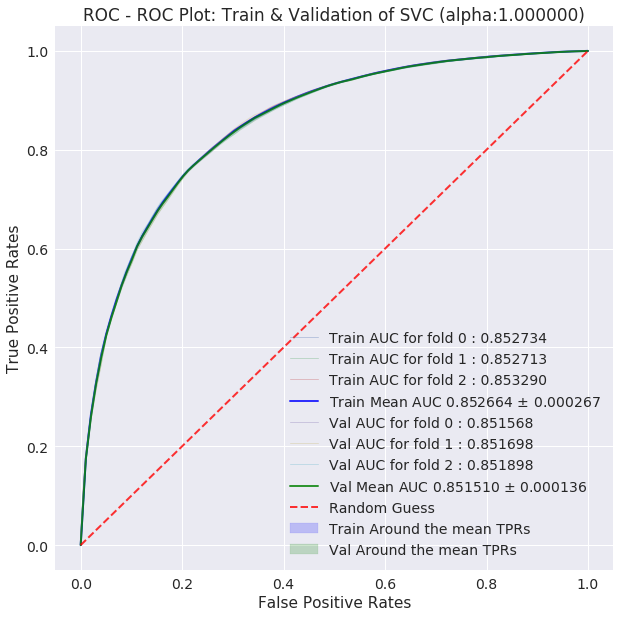

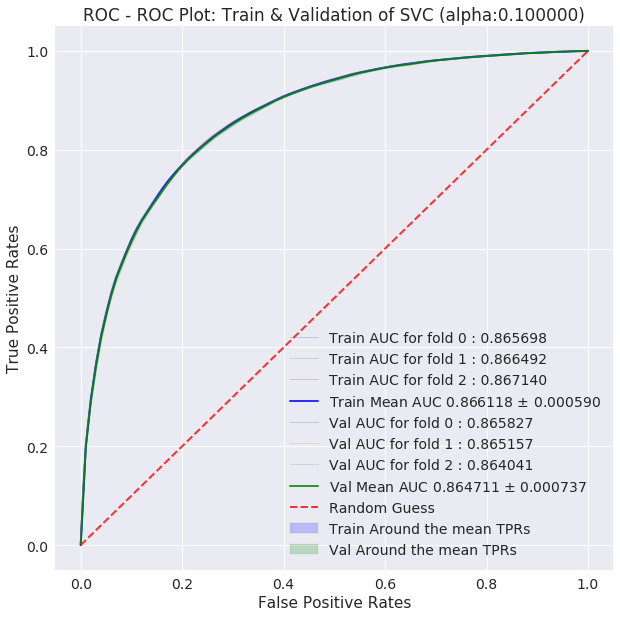

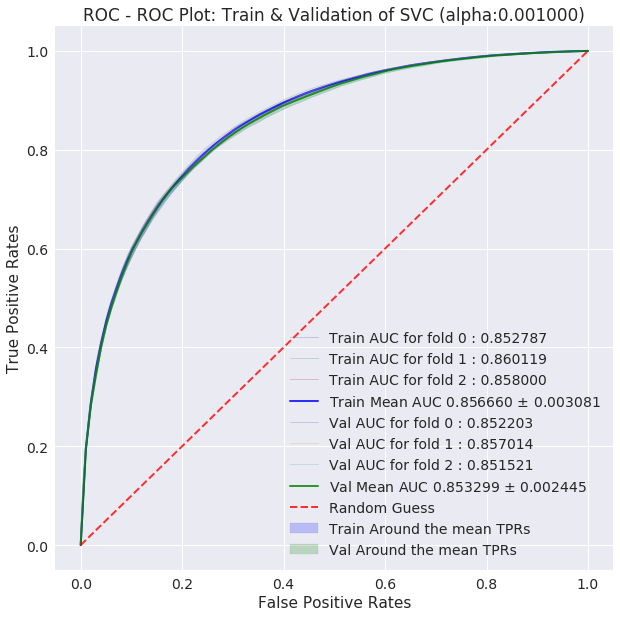

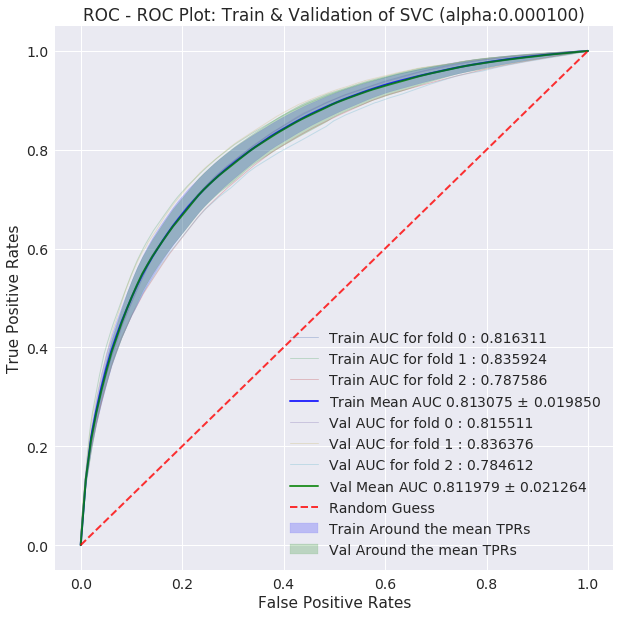

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


 The alpah vs AUC score plot


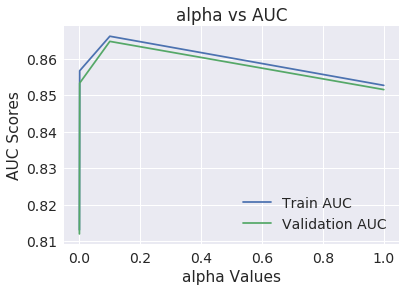

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Best hyperparam value:  0.1


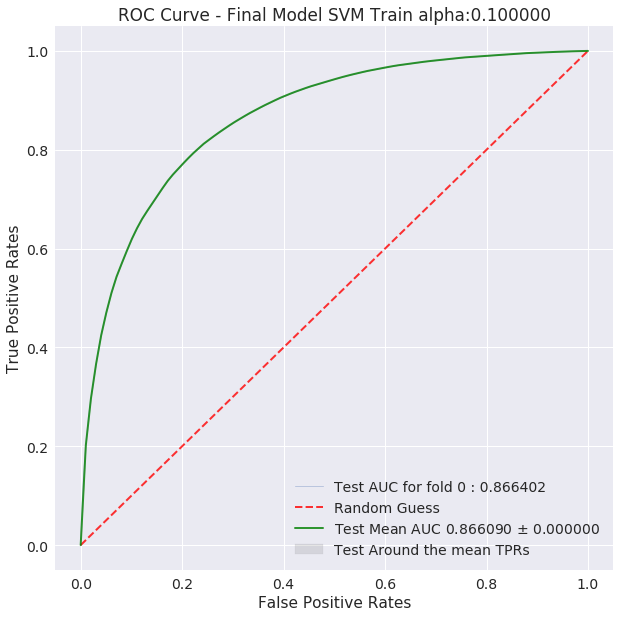

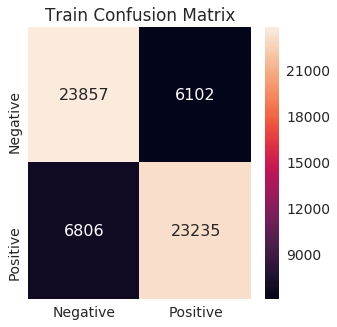

               Negative      Positive
Precision      0.778039      0.792003
Recall         0.796322      0.773443
Fscore         0.787074      0.782613
Support    29959.000000  30041.000000


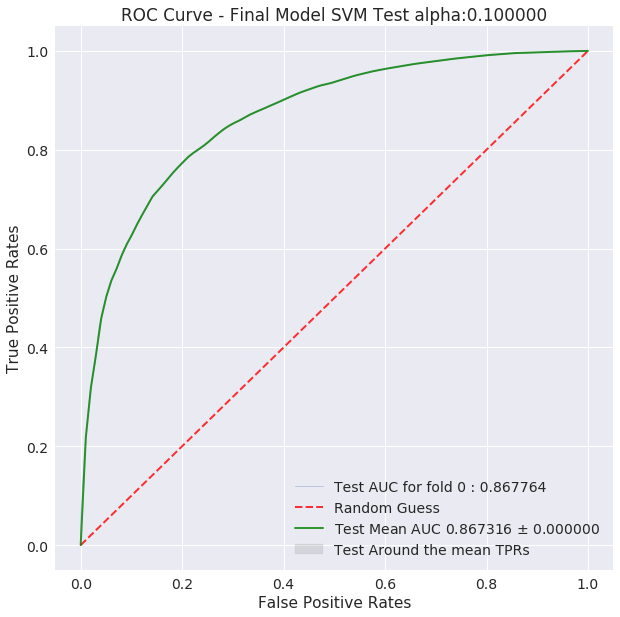

Test auc score  0.8673164550517061


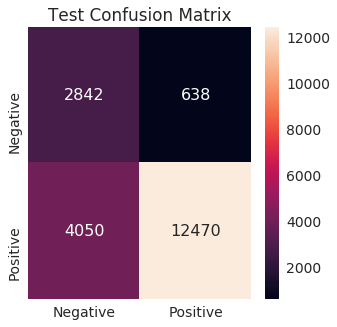

              Negative      Positive
Precision     0.412362      0.951327
Recall        0.816667      0.754843
Fscore        0.548014      0.841771
Support    3480.000000  16520.000000
Results Summary: 
 [('Hyper Param', '0.1'), ('AUC', '0.8673'), ('f-score(-ve)', '54.8014'), ('f-score(+ve)', '84.1771')]


In [30]:
# read the train, test data and preprocess it
train_features, train_labels, test_features, test_labels = preprocess_data(config_dict,
                                                                            scaling=True,
                                                                            dim_reduction=False)

# train and validate the model
model = train_and_validate_model(config_dict, train_features, train_labels)

# test and evaluate the model
ptabe_entry_a8 = test_and_evaluate_model(config_dict, model, test_features, test_labels)

%%HTML
<ul>
<li>The precision for -ve class is less (0.41) </li>
<li> There are 4050 positive data points which got misclassiified</li>
</ul>

## Observation

%%HTML
<ul>
<li> From ROC cures, the hyperparam value C=1.0 with L1 regularizer resulted in a model whose
     performace is really bad (like a random guess model) for both dataset 3 & 4 </li>
</ul>

## [B] RBF SVM

### [B.1] Applying RBF SVM on BOW,<font color='red'> SET 1</font>

In [31]:
config_dict = {
    'train_csv_path' : '/home/amd_3/AAIC/ASM_REPO/Processed_data/AMZN_FOOD_REVIW/BOW/train_bow_bigram.csv',
    'test_csv_path' : '/home/amd_3/AAIC/ASM_REPO/Processed_data/AMZN_FOOD_REVIW/BOW/test_bow_bigram.csv',
    'train_size' : 15000,
    'test_size' : 10000,
    'hyperparam_list' : [1.0, 0.01],
    'penalty' : 'l1',
    'kernel' : 'rbf',
    'implementation' : 'SVC' # 'SGD' or 'SVC'
}

Train df shape (15000, 503)
Class label distribution in train df:
 0    7576
1    7424
Name: Label, dtype: int64
Test df shape (10000, 503)
Class label distribution in test df:
 1    8261
0    1739
Name: Label, dtype: int64
Shape of ->  train features :15000,501, test features: 10000,501
Shape of -> train labels :15000, test labels: 10000


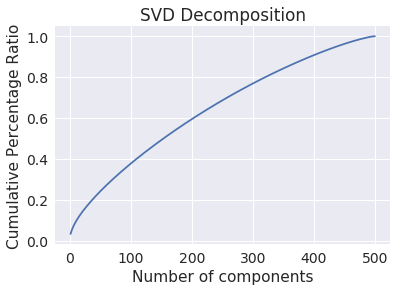

Num dimensions selected by SVD 444
Total variance captured:0.957693
Shape of train df:(15000,444), Test DF:(10000,444)


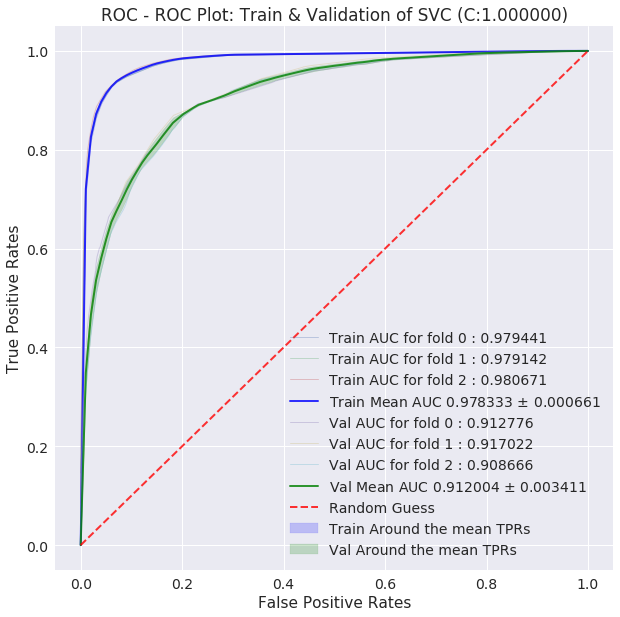

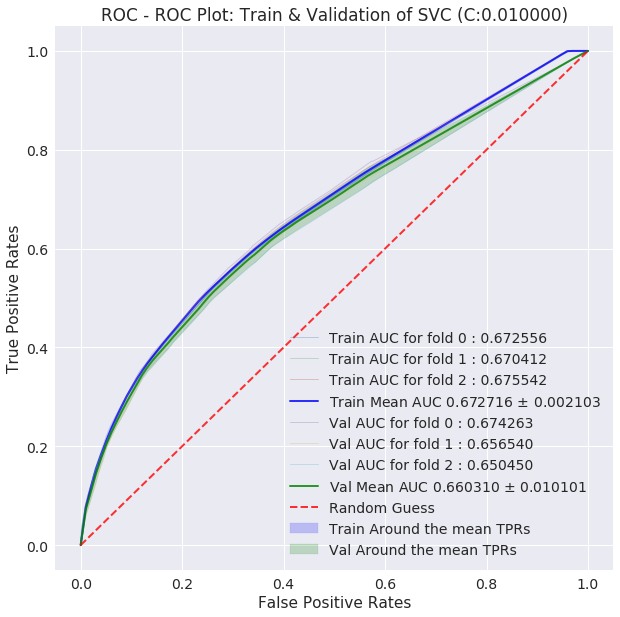

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


 The C vs AUC score plot


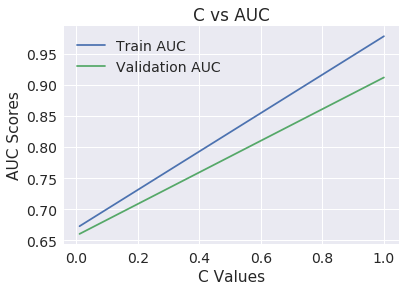

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Best hyperparam value:  1.0


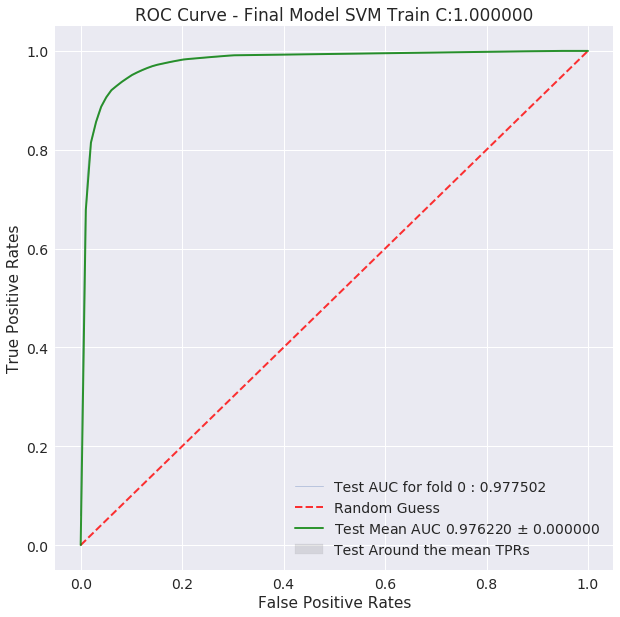

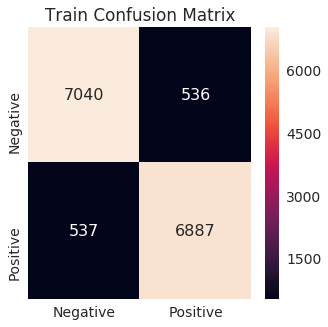

              Negative     Positive
Precision     0.929128     0.927792
Recall        0.929250     0.927667
Fscore        0.929189     0.927730
Support    7576.000000  7424.000000


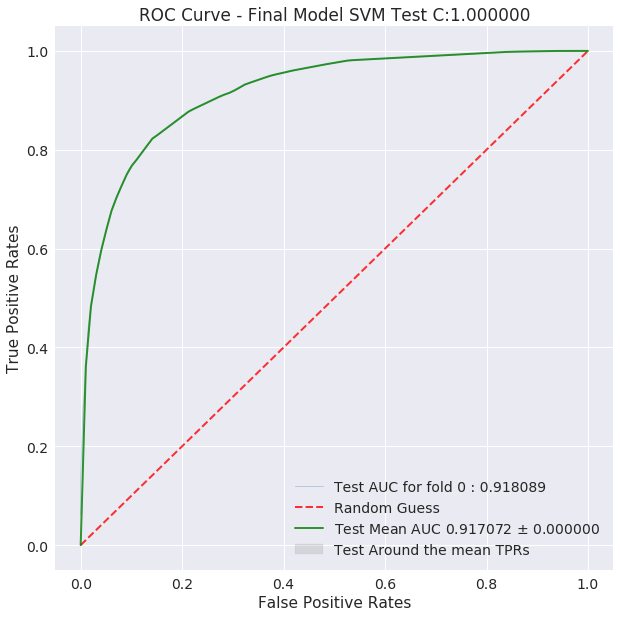

Test auc score  0.9170717566210514


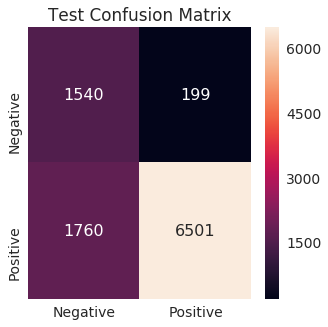

              Negative     Positive
Precision     0.466667     0.970299
Recall        0.885566     0.786951
Fscore        0.611232     0.869060
Support    1739.000000  8261.000000
Results Summary: 
 [('Hyper Param', '1.0'), ('AUC', '0.9171'), ('f-score(-ve)', '61.1232'), ('f-score(+ve)', '86.9060')]


In [32]:
# read the train, test data and preprocess it
train_features, train_labels, test_features, test_labels = preprocess_data(config_dict,
                                                                            scaling=True,
                                                                            dim_reduction=True)

# train and validate the model
model = train_and_validate_model(config_dict, train_features, train_labels)

# test and evaluate the model
ptabe_entry_b1 = test_and_evaluate_model(config_dict, model, test_features, test_labels)

%%HTML
<ul>
<li>The precision for -ve class is less (0.46) </li>
<li> As value of C increases there is sharp increase in AUC</li>
</ul>

### [B.2] Applying RBF SVM on TFIDF,<font color='red'> SET 2</font>

In [33]:
config_dict = {
    'train_csv_path' : '/home/amd_3/AAIC/ASM_REPO/Processed_data/AMZN_FOOD_REVIW/TFIDF/train_bigram_tfidf.csv',
    'test_csv_path' : '/home/amd_3/AAIC/ASM_REPO/Processed_data/AMZN_FOOD_REVIW/TFIDF/test_bigram_tfidf.csv',
    'train_size' : 15000,
    'test_size' : 10000,
    'hyperparam_list' : [1.0, 0.01],
    'penalty' : 'l1', # l1
    'kernel' : 'rbf',
    'implementation' : 'SVC' # 'SGD' or 'SVC' 
}

Train df shape (15000, 503)
Class label distribution in train df:
 0    7576
1    7424
Name: Label, dtype: int64
Test df shape (10000, 503)
Class label distribution in test df:
 1    8261
0    1739
Name: Label, dtype: int64
Shape of ->  train features :15000,501, test features: 10000,501
Shape of -> train labels :15000, test labels: 10000


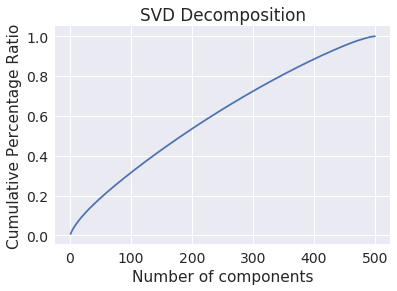

Num dimensions selected by SVD 473
Total variance captured:0.980261
Shape of train df:(15000,473), Test DF:(10000,473)


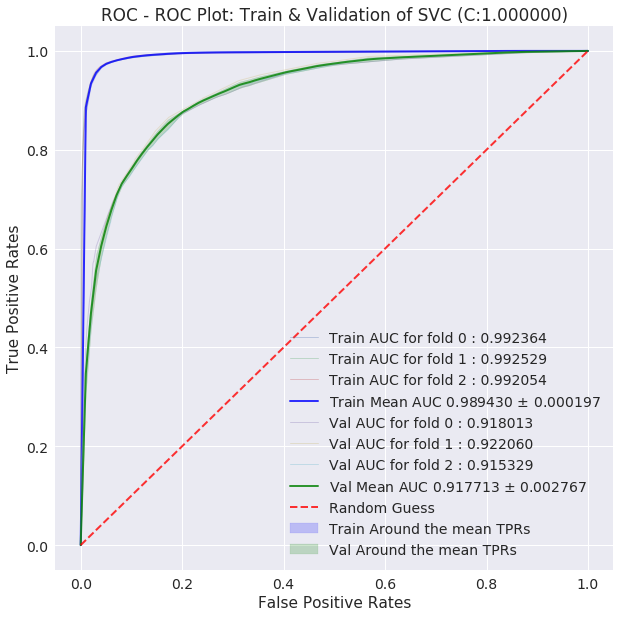

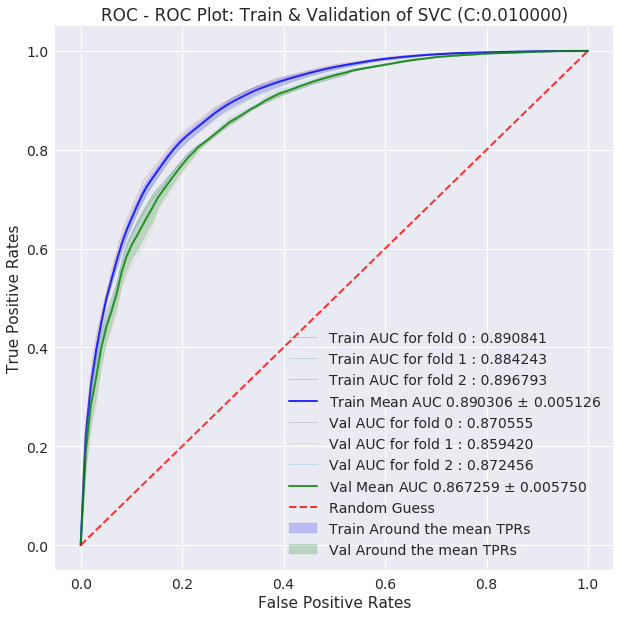

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


 The C vs AUC score plot


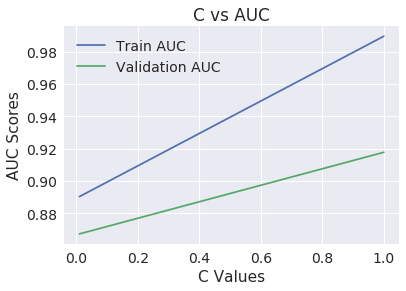

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Best hyperparam value:  1.0


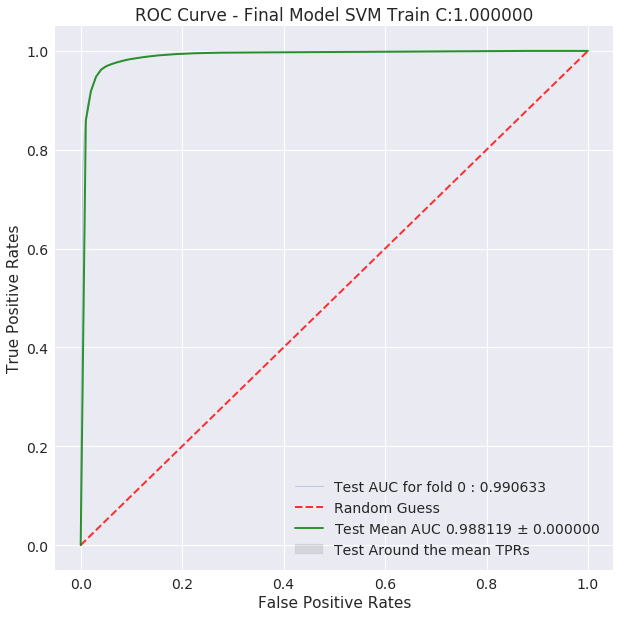

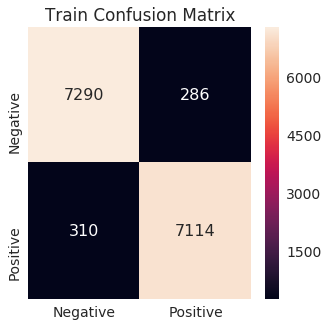

              Negative     Positive
Precision     0.959211     0.961351
Recall        0.962249     0.958244
Fscore        0.960727     0.959795
Support    7576.000000  7424.000000


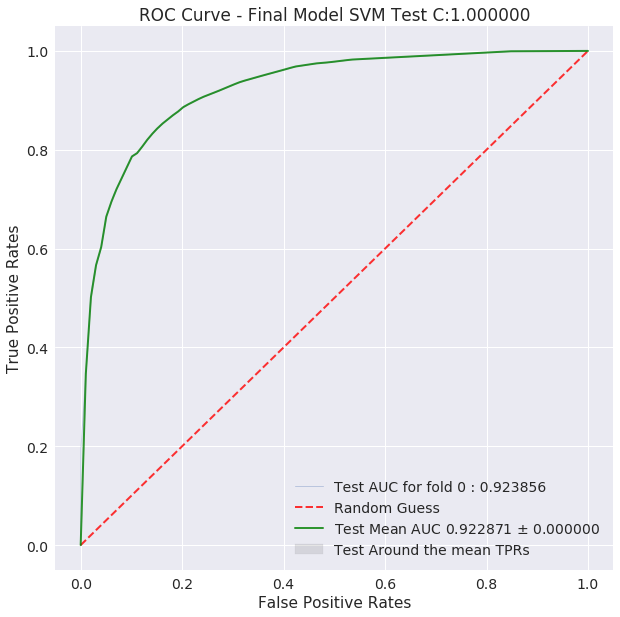

Test auc score  0.9228709954831394


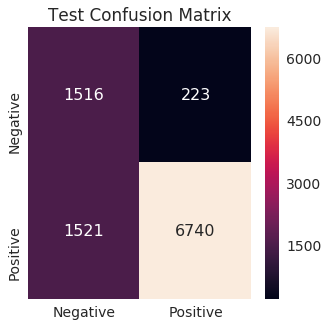

              Negative     Positive
Precision     0.499177     0.967974
Recall        0.871765     0.815882
Fscore        0.634841     0.885444
Support    1739.000000  8261.000000
Results Summary: 
 [('Hyper Param', '1.0'), ('AUC', '0.9229'), ('f-score(-ve)', '63.4841'), ('f-score(+ve)', '88.5444')]


In [34]:
# read the train, test data and preprocess it
train_features, train_labels, test_features, test_labels = preprocess_data(config_dict,
                                                                            scaling=True,
                                                                            dim_reduction=True)

# train and validate the model
model = train_and_validate_model(config_dict, train_features, train_labels)

# test and evaluate the model
ptabe_entry_b2 = test_and_evaluate_model(config_dict, model, test_features, test_labels)

%%HTML
<ul>
<li>The precision for -ve class is less (0.49) </li>
<li> As the value of C increases the AUC increases</li>
</ul>

### [B.3]  Applying RBF SVM on AVG W2V,<font color='red'> SET 3</font>

In [35]:
config_dict = {
    'train_csv_path' : '/home/amd_3/AAIC/ASM_REPO/Processed_data/AMZN_FOOD_REVIW/AVG_W2V/train_avg_w2v.csv',
    'test_csv_path' : '/home/amd_3/AAIC/ASM_REPO/Processed_data/AMZN_FOOD_REVIW/AVG_W2V/test_avg_w2v.csv',
    'train_size' : 15000,
    'test_size' : 10000,
    'hyperparam_list' : [1.0, 0.01],
    'penalty' : 'l1', # l1
    'kernel' : 'rbf',
    'implementation' : 'SVC' # 'SGD' or 'SVC'
}

In [ ]:
# read the train, test data and preprocess it
train_features, train_labels, test_features, test_labels = preprocess_data(config_dict,
                                                                            scaling=True,
                                                                            dim_reduction=False)

# train and validate the model
model = train_and_validate_model(config_dict, train_features, train_labels)

# test and evaluate the model
ptabe_entry_b3 = test_and_evaluate_model(config_dict, model, test_features, test_labels)

%%HTML
<ul>
<li>The precision for -ve class is less (0.51) </li>
<li> As the value of C increases the AUC increases </li>
</ul>

### [B.4]  Applying RBF SVM on TFIDF W2V,<font color='red'> SET 4</font>

In [37]:
config_dict = {
    'train_csv_path' : '/home/amd_3/AAIC/ASM_REPO/Processed_data/AMZN_FOOD_REVIW/TFIDF_W2V/train_tf_w2v.csv',
    'test_csv_path' : '/home/amd_3/AAIC/ASM_REPO/Processed_data/AMZN_FOOD_REVIW/TFIDF_W2V/test_tf_w2v.csv',
    'train_size' : 15000,
    'test_size' : 10000,
    'hyperparam_list' : [1.0, 0.01],
    'penalty' : 'l1', # l1
    'kernel' : 'rbf',
    'implementation' : 'SVC' # 'SGD' or 'SVC'
}

Train df shape (15000, 52)
Class label distribution in train df:
 0    7576
1    7424
Name: Label, dtype: int64
Test df shape (10000, 52)
Class label distribution in test df:
 1    8261
0    1739
Name: Label, dtype: int64
Shape of ->  train features :15000,50, test features: 10000,50
Shape of -> train labels :15000, test labels: 10000


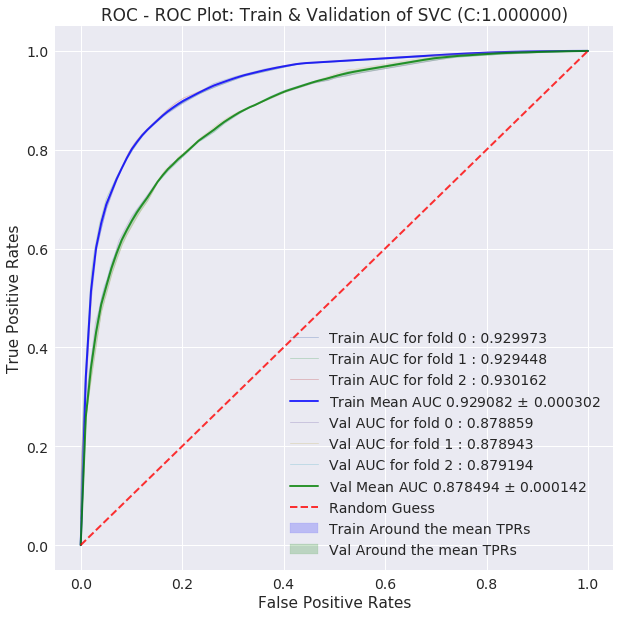

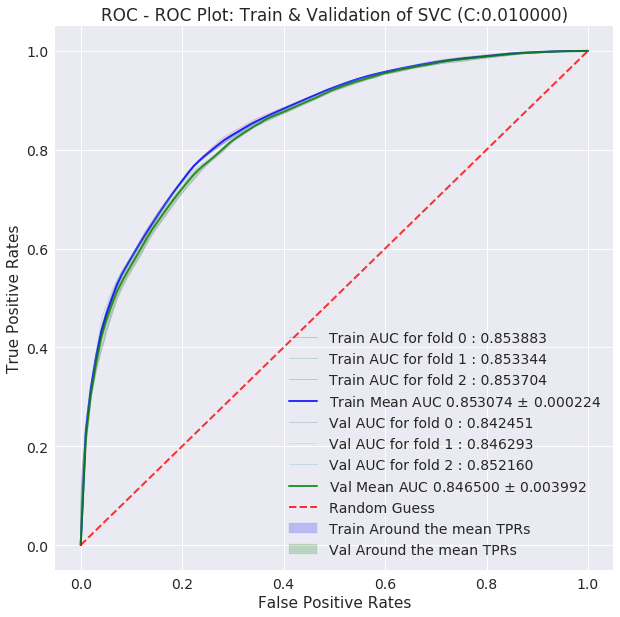

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


 The C vs AUC score plot


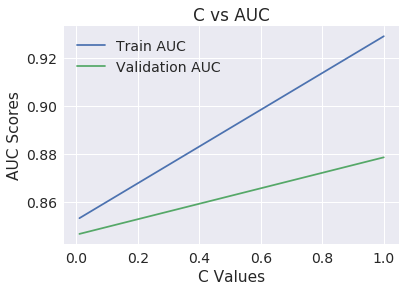

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Best hyperparam value:  1.0


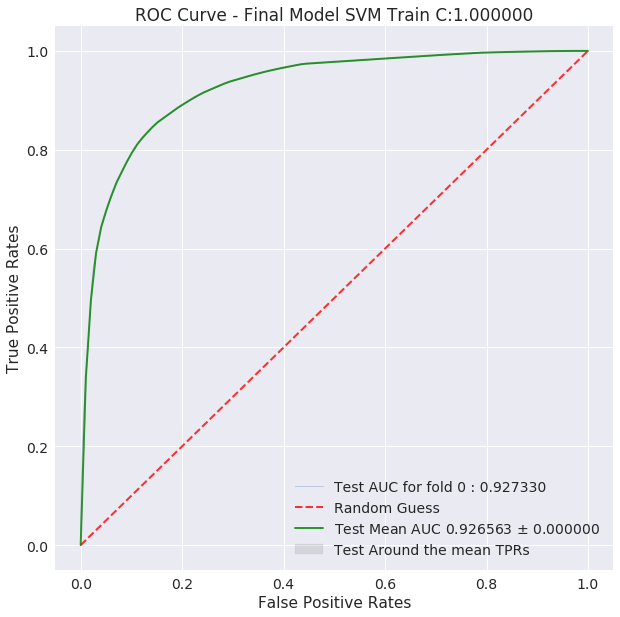

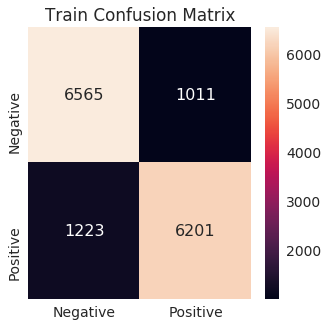

              Negative     Positive
Precision     0.842964     0.859817
Recall        0.866552     0.835264
Fscore        0.854595     0.847363
Support    7576.000000  7424.000000


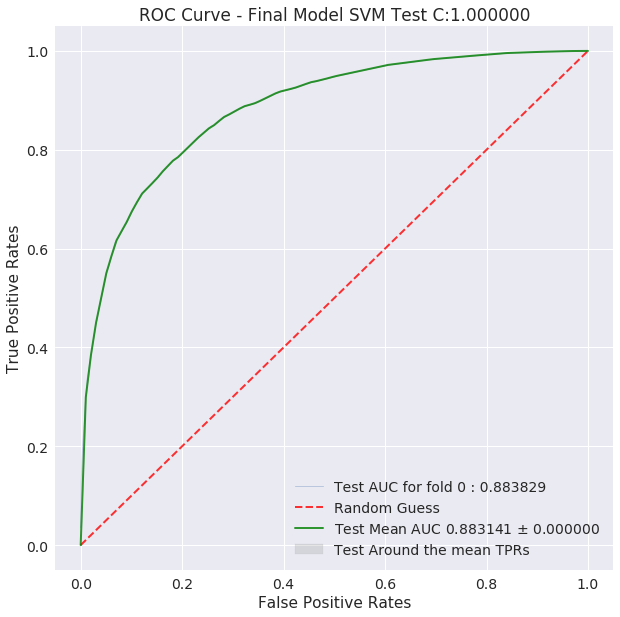

Test auc score  0.8831406979747827


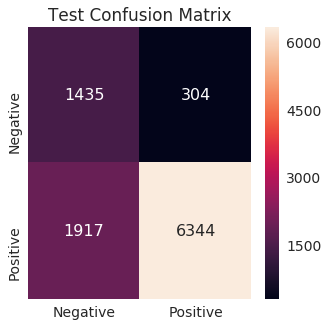

              Negative     Positive
Precision     0.428103     0.954272
Recall        0.825187     0.767946
Fscore        0.563740     0.851030
Support    1739.000000  8261.000000
Results Summary: 
 [('Hyper Param', '1.0'), ('AUC', '0.8831'), ('f-score(-ve)', '56.3740'), ('f-score(+ve)', '85.1030')]


In [38]:
# read the train, test data and preprocess it
train_features, train_labels, test_features, test_labels = preprocess_data(config_dict,
                                                                            scaling=True,
                                                                            dim_reduction=False)

# train and validate the model
model = train_and_validate_model(config_dict, train_features, train_labels)

# test and evaluate the model
ptabe_entry_b4 = test_and_evaluate_model(config_dict, model, test_features, test_labels)

%%HTML
<ul>
<li>The precision for -ve class is less (0.42) </li>
<li> As the value of C increases the AUC increases </li>
</ul>

# Procedure Summary

%%HTML
<ol>
<li> Standardied all the four datasets using standard scaler of sklearn, for kernel-SVM
     the dimension of dataset is reduced by applying TrucatedSVD </li>
<li> All models are trained with diffetent hyper parameter values </li>
<li> The best hyper parameter is identified using cross validation method </li>
<li> The final model is build using the best hyper parameter </li>
<li> The performace of model is tested using test dataset and performace visaulized using
     ROC curve and confusion matrix heatmaps </li>
</ol>

# Results Summary

In [39]:
Pret_table = PrettyTable()
Pret_table.field_names = ['Kernel', 'Vectorizer', 'Penalty', 'Hyper-Param (C)', 'AUC', 'Fscore (-ve)', 
                          'Fscore (+ve)']
Pret_table.title = 'SVM Results Summary'

In [40]:
# linear SVM
Pret_table.add_row(['Linear', 'BoW', 'L1'] + ptabe_entry_a1)
Pret_table.add_row(['Linear', 'BoW', 'L2'] + ptabe_entry_a2)
Pret_table.add_row(['Linear', 'TF-IDF', 'L1'] + ptabe_entry_a3)
Pret_table.add_row(['Linear', 'TF-IDF', 'L2'] + ptabe_entry_a4)
Pret_table.add_row(['Linear', 'Avg W2V', 'L1'] + ptabe_entry_a5)
Pret_table.add_row(['Linear', 'Avg W2V', 'L2'] + ptabe_entry_a6)
Pret_table.add_row(['Linear', 'TF-IDF W2V', 'L1'] + ptabe_entry_a7)
Pret_table.add_row(['Linear', 'TF-IDF W2V', 'L2'] + ptabe_entry_a8)

# Kernel SVM
Pret_table.add_row(['RBF', 'BoW', 'N/A'] + ptabe_entry_b1)
Pret_table.add_row(['RBF', 'TF-IDF', 'N/A'] + ptabe_entry_b2)
Pret_table.add_row(['RBF', 'Avg W2V', 'N/A'] + ptabe_entry_b3)
Pret_table.add_row(['RBF', 'TF-IDF W2V', 'N/A'] + ptabe_entry_b4)

In [41]:
print(Pret_table)

+----------------------------------------------------------------------------------------+
|                                  SVM Results Summary                                   |
+--------+------------+---------+-----------------+--------+--------------+--------------+
| Kernel | Vectorizer | Penalty | Hyper-Param (C) |  AUC   | Fscore (-ve) | Fscore (+ve) |
+--------+------------+---------+-----------------+--------+--------------+--------------+
| Linear |    BoW     |    L1   |      0.001      | 0.9168 |   64.7135    |   89.3345    |
| Linear |    BoW     |    L2   |       0.1       | 0.9254 |   66.3440    |   90.0997    |
| Linear |   TF-IDF   |    L1   |      0.001      | 0.9195 |   64.7263    |   89.4518    |
| Linear |   TF-IDF   |    L2   |       0.1       | 0.9313 |   65.4659    |   89.4989    |
| Linear |  Avg W2V   |    L1   |      0.001      | 0.9146 |   61.1376    |   87.2814    |
| Linear |  Avg W2V   |    L2   |       0.1       | 0.9190 |   62.2277    |   87.9293    |

# Conclusions

%%HTML
<ul>
<li> The best performnace obtained is from Linear-SVM with L2 regularizer (f-score 90.09 +ve)
     (f-score 66.34 -ve) </li>
<li> There is no significant performace difference among any model for +ve class </li>
<li> F-score for -ve class when tested on TF-IDF dataset is around 55% (very low) for both linear 
     and kernel SVM </li>
</ul>